#Customer Segmention & Personality Analysis

**Objective:**

Customer personality analysis helps businesses understand customer behavior and segment their audience effectively.  

This allows companies to tailor products and services to meet the needs of specific groups.  

By identifying potential customers, businesses can focus marketing efforts on high-value segments.  

This approach improves efficiency, reduces costs, and increases customer satisfaction.


## **1. Import Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('/content/marketing_campaign1 (1) (1).xlsx')

In [4]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [5]:
# finding the dimensions of the data
print('Number of rows are {} and number of columns are {}'.format(df.shape[0], df.shape[1]))

Number of rows are 2240 and number of columns are 29


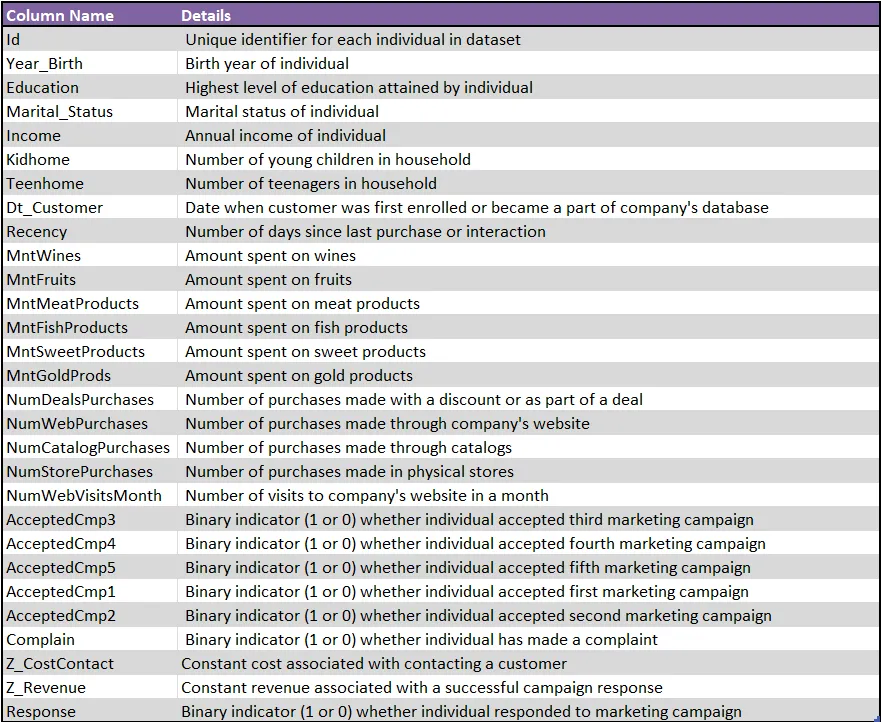

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [7]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue                       int64
Response                        int64
dtype: object

In [8]:
df.dtypes.value_counts()

int64             25
object             2
float64            1
datetime64[ns]     1
Name: count, dtype: int64

## **2. Data Cleaning**

In [9]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


In [11]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [12]:
df.describe().T

count                           mean  \
ID                   2240.0                    5592.159821   
Year_Birth           2240.0                    1968.805804   
Income               2216.0                   52247.251354   
Kidhome              2240.0                       0.444196   
Teenhome             2240.0                        0.50625   
Dt_Customer            2240  2013-07-10 10:01:42.857142784   
Recency              2240.0                      49.109375   
MntWines             2240.0                     303.935714   
MntFruits            2240.0                      26.302232   
MntMeatProducts      2240.0                         166.95   
MntFishProducts      2240.0                      37.525446   
MntSweetProducts     2240.0                      27.062946   
MntGoldProds         2240.0                      44.021875   
NumDealsPurchases    2240.0                          2.325   
NumWebPurchases      2240.0                       4.084821   
NumCatalogPurchases  2240.0                       2.662054   
NumStorePurchases    2240.0                       5.790179   
NumWebVisitsMonth    2240.0                       5.316518   
AcceptedCmp3         2240.0                       0.072768   
AcceptedCmp4         2240.0                       0.074554   
AcceptedCmp5         2240.0                       0.072768   
AcceptedCmp1         2240.0                       0.064286   
AcceptedCmp2         2240.0                       0.013393   
Complain             2240.0                       0.009375   
Z_CostContact        2240.0                            3.0   
Z_Revenue            2240.0                           11.0   
Response             2240.0                       0.149107   

                                     min                  25%  \
ID                                   0.0              2828.25   
Year_Birth                        1893.0               1959.0   
Income                            1730.0              35303.0   
Kidhome                              0.0                  0.0   
Teenhome                             0.0                  0.0   
Dt_Customer          2012-07-30 00:00:00  2013-01-16 00:00:00   
Recency                              0.0                 24.0   
MntWines                             0.0                23.75   
MntFruits                            0.0                  1.0   
MntMeatProducts                      0.0                 16.0   
MntFishProducts                      0.0                  3.0   
MntSweetProducts                     0.0                  1.0   
MntGoldProds                         0.0                  9.0   
NumDealsPurchases                    0.0                  1.0   
NumWebPurchases                      0.0                  2.0   
NumCatalogPurchases                  0.0                  0.0   
NumStorePurchases                    0.0                  3.0   
NumWebVisitsMonth                    0.0                  3.0   
AcceptedCmp3                         0.0                  0.0   
AcceptedCmp4                         0.0                  0.0   
AcceptedCmp5                         0.0                  0.0   
AcceptedCmp1                         0.0                  0.0   
AcceptedCmp2                         0.0                  0.0   
Complain                             0.0                  0.0   
Z_CostContact                        3.0                  3.0   
Z_Revenue                           11.0                 11.0   
Response                             0.0                  0.0   

                                     50%                  75%  \
ID                                5458.5              8427.75   
Year_Birth                        1970.0               1977.0   
Income                           51381.5              68522.0   
Kidhome                              0.0                  1.0   
Teenhome                             0.0                  1.0   
Dt_Customer          2013-07-08 12:00:00  2013-12-30 06:00:00   
Recency  

## **3. Exploratory Data Analysis**

In [13]:
#selecting rows based on conditionals
df[df['Income']>60000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2      4141        1965  Graduation       Together   71613.0        0   
5      7446        1967      Master       Together   62513.0        0   
12     2125        1959  Graduation       Divorced   63033.0        0   
15     2114        1946         PhD         Single   82800.0        0   
18     6565        1949      Master        Married   76995.0        0   
...     ...         ...         ...            ...       ...      ...   
2226   4478        1979  Graduation        Married   63777.0        1   
2233   9432        1977  Graduation       Together  666666.0        1   
2235  10870        1967  Graduation        Married   61223.0        0   
2236   4001        1946         PhD       Together   64014.0        2   
2238   8235        1956      Master       Together   69245.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2            0  2013-08-21       26       426  ...                  4   
5            1  2013-09-09       16       520  ...                  6   
12           0  2013-11-15       82       194  ...                  2   
15           0  2012-11-24       23      1006  ...                  3   
18           1  2013-03-28       91      1012  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2226         1  2013-03-24       87       457  ...                  8   
2233         0  2013-06-02       23         9  ...                  6   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2238         1  2014-01-24        8       428  ...                  3   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2                0             0             0             0             0   
5                0             0             0             0             0   
12               0             0             0             0             0   
15               0             0             1             1             0   
18               0             0             0             1             0   
...            ...           ...           ...           ...           ...   
2226             0             0             0             0             0   
2233             0             0             0             0             0   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2238             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2            0              3         11         0  
5            0              3         11         0  
12           0              3         11         0  
15           0              3         11         1  
18           0              3         11         0  
...        ...            ...        ...       ...  
2226         0              3         11         0  
2233         0              3         11         0  
2235         0              3         11         0  
2236         0              3         11         0  
2238         0              3         11         0  

[841 rows x 29 columns]

In [14]:
print('Total no of customers Greater than 60000 income:' ,df[df['Income']>60000].shape[0])

Total no of customers Greater than 60000 income: 841


In [15]:
print('Total no of customers Greater than 80000 income:' ,df[df['Income']>80000].shape[0])

Total no of customers Greater than 80000 income: 217


In [16]:
print('Total no of customers Greater than 1 lakh income:' ,df[df['Income']>100000].shape[0])

Total no of customers Greater than 1 lakh income: 13


In [17]:
df['Year_Birth'].nunique()

59

In [18]:
print('year_of_births:', np.sort(df['Year_Birth'].unique()))

year_of_births: [1893 1899 1900 1940 1941 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996]


In [19]:
# Get the year of birth with maximum count
max_year = df.Year_Birth.value_counts().idxmax()

# Get the total number of occurrences of that year
total_count = df.Year_Birth.value_counts().max()

print(f"Year of birth with maximum count: {max_year}")
print(f"Total number of occurrences: {total_count}")

Year of birth with maximum count: 1976
Total number of occurrences: 89


year_birth_stats 
 count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


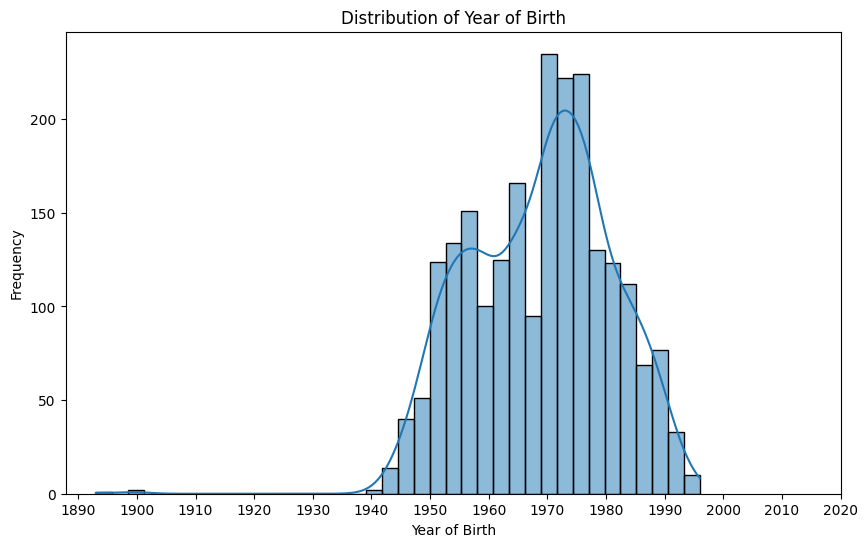

In [20]:
# Calculate descriptive statistics for 'Year_Birth'
year_birth_stats = df['Year_Birth'].describe()
print('year_birth_stats \n',year_birth_stats)

# Create a histogram of 'Year_Birth'
plt.figure(figsize=(10, 6))
sns.histplot(df['Year_Birth'], kde=True)
plt.title('Distribution of Year of Birth')
plt.xlabel('Year of Birth')
plt.xticks(ticks=range(1890, 2024, 10))
plt.ylabel('Frequency')
plt.show()

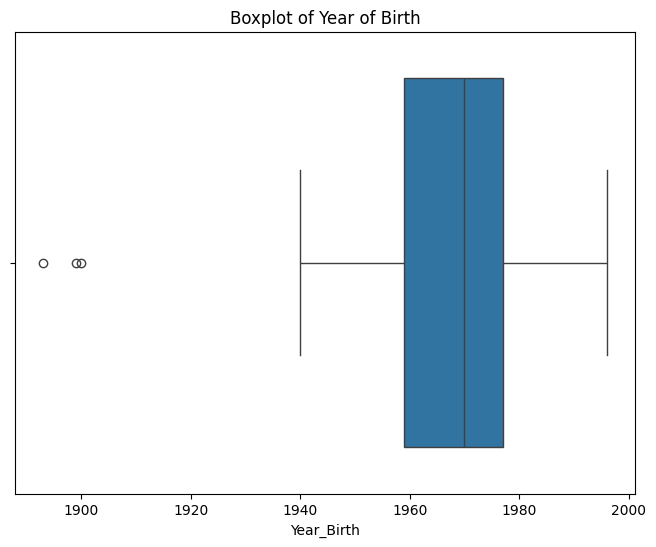

Number of outliers in Year_Birth: 3


In [21]:
# Create a boxplot of 'Year_Birth' to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Year_Birth'])
plt.title('Boxplot of Year of Birth')
plt.show()
#Number of outliers
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Year_Birth'] < lower_bound) | (df['Year_Birth'] > upper_bound)]
print("Number of outliers in Year_Birth:", len(outliers))


In [22]:
#grouping rows by Year_Birth
df.groupby('Year_Birth').mean(numeric_only=True)

ID        Income   Kidhome  Teenhome    Recency  \
Year_Birth                                                              
1893        11004.000000  60182.000000  0.000000  1.000000  23.000000   
1899         1150.000000  83532.000000  0.000000  0.000000  36.000000   
1900         7829.000000  36640.000000  1.000000  0.000000  99.000000   
1940         6663.000000  51141.000000  0.000000  0.000000  96.000000   
1941         6932.000000  93027.000000  0.000000  0.000000  77.000000   
1943         5244.714286  62324.166667  0.000000  0.000000  61.571429   
1944         4478.428571  66477.142857  0.000000  0.000000  36.857143   
1945         5217.875000  70375.375000  0.000000  0.000000  32.625000   
1946         5049.625000  59944.250000  0.250000  0.187500  40.312500   
1947         5828.125000  66327.562500  0.000000  0.312500  50.000000   
1948         6286.095238  65405.047619  0.095238  0.619048  51.476190   
1949         5561.300000  61547.200000  0.200000  0.633333  41.133333   
1950         6457.448276  50197.172414  0.482759  0.862069  45.827586   
1951         5293.558140  55999.857143  0.279070  0.720930  56.604651   
1952         5556.000000  56903.673077  0.250000  0.750000  49.500000   
1953         5357.371429  57810.000000  0.314286  0.800000  60.742857   
1954         5176.140000  58628.387755  0.200000  0.740000  45.220000   
1955         5455.877551  57611.375000  0.265306  0.755102  49.489796   
1956         6020.290909  56706.600000  0.309091  0.800000  51.145455   
1957         6046.209302  54020.268293  0.302326  0.720930  48.162791   
1958         5365.490566  58603.711538  0.264151  0.716981  50.358491   
1959         6621.941176  56324.080000  0.196078  0.666667  52.235294   
1960         5103.734694  54817.632653  0.244898  0.714286  49.877551   
1961         6544.555556  57161.057143  0.277778  0.694444  43.916667   
1962         5518.636364  60988.954545  0.204545  0.772727  50.909091   
1963         5458.711111  48815.863636  0.333333  0.777778  47.111111   
1964         5738.761905  56473.902439  0.261905  0.880952  59.928571   
1965         5282.337838  55668.662162  0.337838  0.702703  52.297297   
1966         5018.780000  50960.460000  0.340000  0.800000  49.340000   
1967         5482.204545  53782.431818  0.590909  0.772727  53.090909   
1968         6105.156863  48597.450980  0.607843  0.764706  49.490196   
1969         5839.873239  51205.628571  0.436620  0.563380  50.281690   
1970         5050.376623  52395.973333  0.506494  0.493506  41.636364   
1971         5617.850575  49354.906977  0.632184  0.505747  48.252874   
1972         5155.278481  51123.333333  0.632911  0.481013  47.354430   
1973         5428.216216  47219.722222  0.675676  0.500000  47.878378   
1974         5515.550725  48338.898551  0.521739  0.463768  52.449275   
1975         5142.831325  52417.132530  0.481928  0.602410  46.626506   
1976         5618.280899  47539.213483  0.494382  0.584270  50.224719   
1977         5163.807692  62653.038462  0.596154  0.442308  46.384615   
1978         5774.740260  46012.434211  0.740260  0.298701  50.207792   
1979         6229.320755  44956.528302  0.584906  0.396226  52.415094   
1980         5802.256410  49927.025641  0.615385  0.256410  43.948718   
1981         4948.538462  46894.921053  0.717949  0.205128  49.666667   
1982         5644.377778  52683.795455  0.444444  0.044444  43.311111   
1983         5525.976190  47996.390244  0.571429  0.000000  45.642857   
1984         6976.842105  39132.789474  0.763158  0.000000  50.526316   
1985         6229.437500  39192.937500  0.781250  0.000000  61.593750   
1986         5681.476190  43346.414634  0.690476  0.000000  44.166667   
1987         4748.333333  46888.666667  0.333333  0.000000  42.481481   
1988         5851.000000  47947.758621  0.586207  0.000000  52.965517   
1989         5431.166667  42250.172414  0.633333  0.000000  50.633333   
1990         5504.500000  40919.277778  0.333333  0.000000  41.500000   
1991   

**Categorical columns**

explore the categorical variables and their unique categories and frequency.

In [23]:
df['Education'].nunique()

5

In [24]:

df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [25]:
df['Marital_Status'].nunique()

8

In [26]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [27]:
df.sort_values(by='Income', ascending=False) # DESC Order

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233   9432        1977  Graduation       Together  666666.0        1   
617    1503        1976         PhD       Together  162397.0        1   
687    1501        1982         PhD        Married  160803.0        0   
1300   5336        1971      Master       Together  157733.0        1   
164    8475        1973         PhD        Married  157243.0        0   
...     ...         ...         ...            ...       ...      ...   
2078   5079        1971  Graduation        Married       NaN        1   
2079  10339        1954      Master       Together       NaN        0   
2081   3117        1955  Graduation         Single       NaN        0   
2084   5250        1943      Master          Widow       NaN        0   
2228   8720        1978    2n Cycle       Together       NaN        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2233         0  2013-06-02       23         9  ...                  6   
617          1  2013-06-03       31        85  ...                  1   
687          0  2012-08-04       21        55  ...                  0   
1300         0  2013-06-04       37        39  ...                  1   
164          1  2014-03-01       98        20  ...                  0   
...        ...         ...      ...       ...  ...                ...   
2078         1  2013-03-03       82        71  ...                  8   
2079         1  2013-06-23       83       161  ...                  6   
2081         1  2013-10-18       95       264  ...                  7   
2084         0  2013-10-30       75       532  ...                  1   
2228         0  2012-08-12       53        32  ...                  0   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2233             0             0             0             0             0   
617              0             0             0             0             0   
687              0             0             0             0             0   
1300             0             0             0             0             0   
164              0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2078             0             0             0             0             0   
2079             0             0             0             0             0   
2081             0             0             0             0             0   
2084             0             0             1             0             0   
2228             0             1             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2233         0              3         11         0  
617          0              3         11         0  
687          0              3         11         0  
1300         0              3         11         0  
164          0              3         11         0  
...        ...            ...        ...       ...  
2078         0              3         11         0  
2079         0              3         11         0  
2081         0              3         11         0  
2084         0              3         11         1  
2228         0              3         11         0  

[2240 rows x 29 columns]

In [28]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

**Binary Columns**

we can see columns that are numeric but actually were encoded binary categorical columns.(yes or no)

In [29]:
# Code for finding binary columns

binary_columns = []
for col in df.columns:
    if df[col].nunique() == 2:
        binary_columns.append(col)

print("\nBinary Columns:")
binary_columns


Binary Columns:


['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

In [30]:
# exploring numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

#droping binary_columns and ID variables
numerical_columns = numerical_columns.drop(binary_columns)

numerical_columns = numerical_columns.drop('ID')

print("\nNumerical Columns:")
df[numerical_columns].describe().T


Numerical Columns:


count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0

**Finding Outliers**

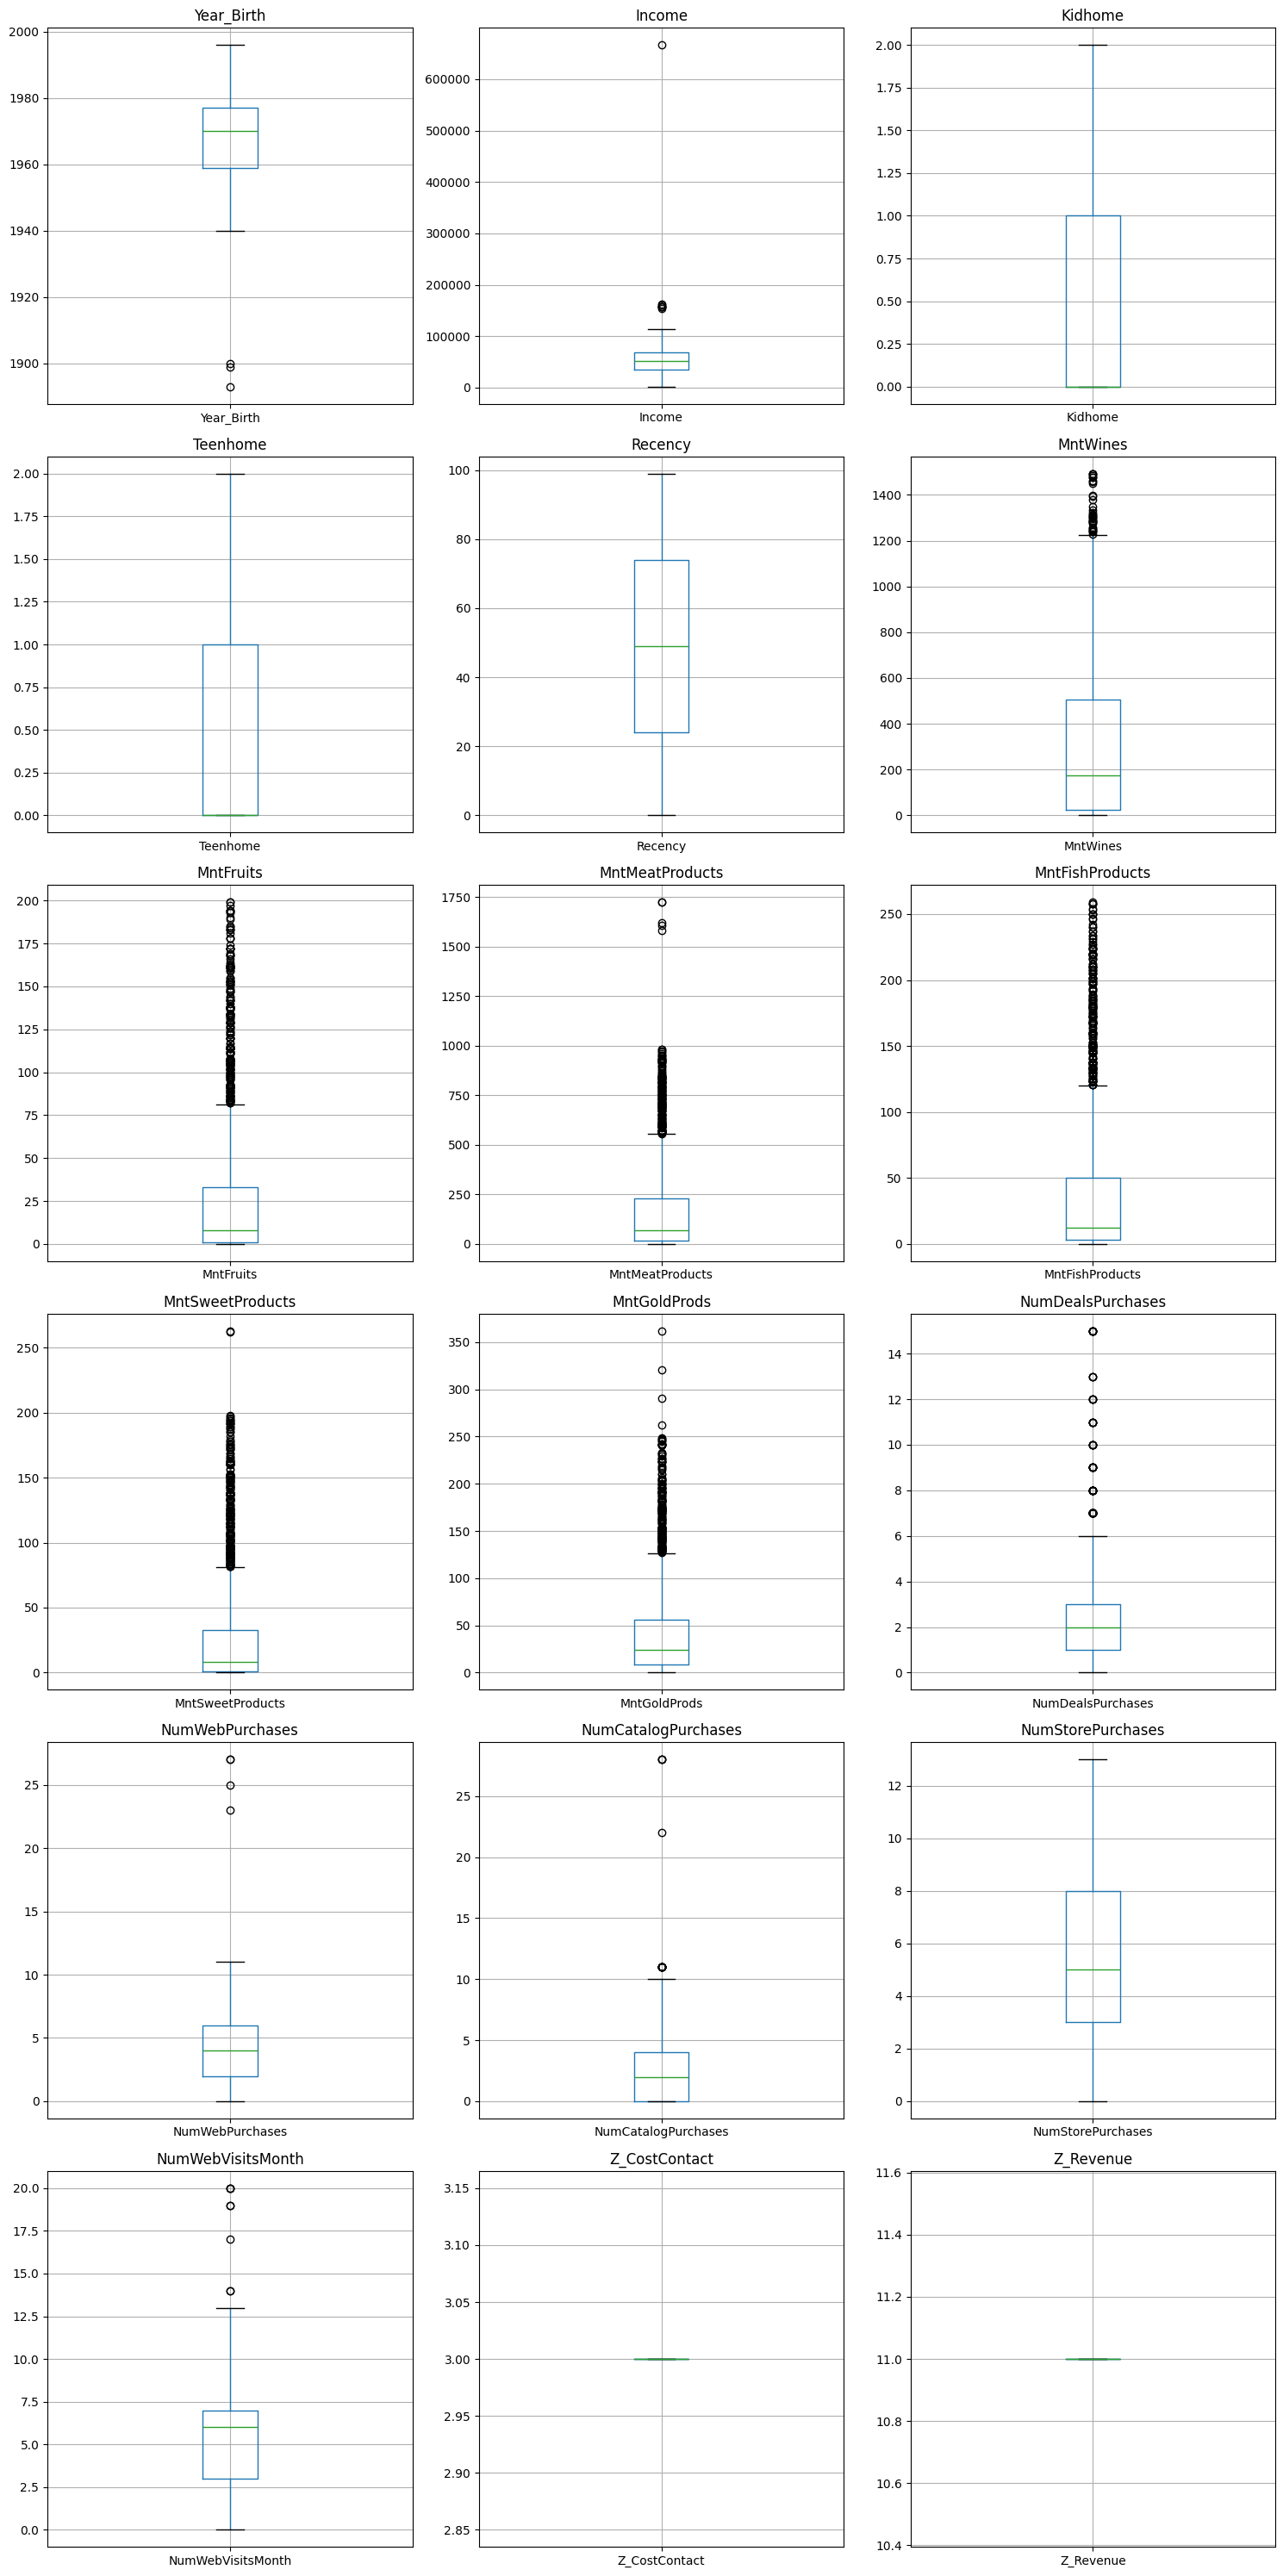

In [31]:
import math
import matplotlib.pyplot as plt

num_columns = len(numerical_columns)
num_rows = math.ceil(num_columns / 3) # Display 3 boxplots per row

# creating subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# flattening the axs array
axs = axs.flatten()

# creating boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    ax = axs[i]
    df.boxplot(column=column, ax=ax)
    ax.set_title(column)
    ax.grid(True)
plt.tight_layout()
plt.show()

## **4. Data Preprocessing**

In [32]:
df_clean = df.copy()

Missing Value Imputation

In [33]:
# performing median value imputation to get rid of the missing value from the Income column

df_clean['Income'].fillna(df_clean['Income'].median(), inplace = True)

In [34]:
# Check for missing values again after imputation
print("\nMissing Values after imputation:")
print(df_clean.isnull().sum().sum())


Missing Values after imputation:
0


Outlier Capping

In [35]:
# Identifing the Columns with outliers

numerical_columns = df.select_dtypes(include=['number']).columns
binary_columns = ['Response', 'Complain'] # these are binary
numerical_columns = numerical_columns.drop('ID')

columns_with_outliers = []
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if len(outliers) > 0:
        columns_with_outliers.append(col)

print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


In [36]:
columns_with_outliers = ['Year_Birth', 'Income', 'MntWines', 'MntFruits',
'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumWebVisitsMonth']

for col in columns_with_outliers:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean[col] = np.clip(df_clean[col], lower_bound, upper_bound)

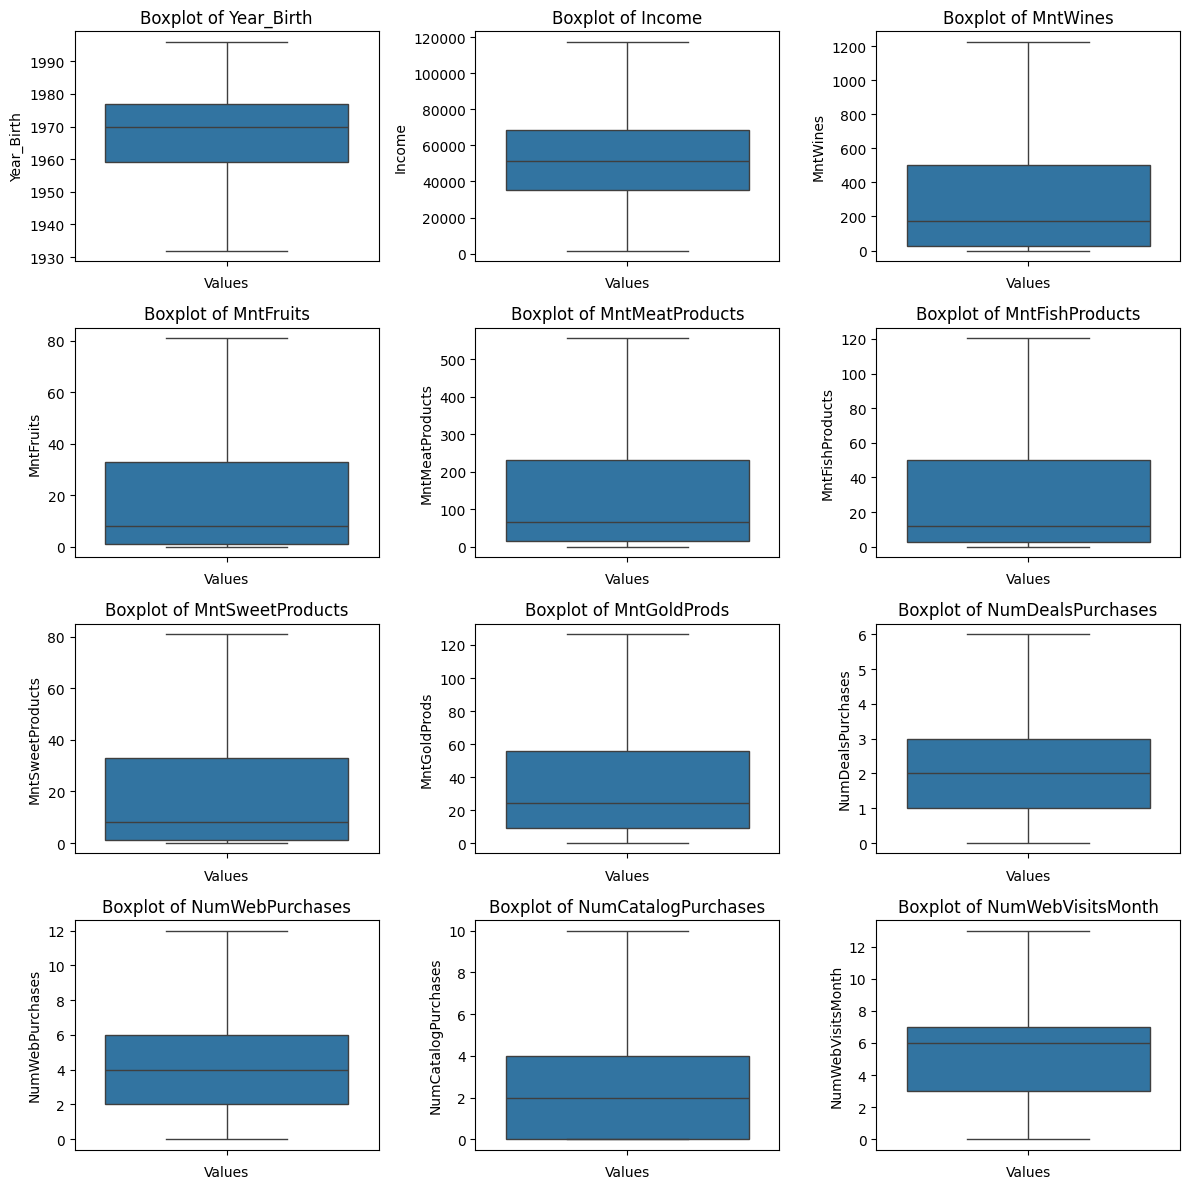

In [37]:
num_columns = 3 # Number of columns in the subplot grid
num_rows = (len(columns_with_outliers) - 1) // num_columns + 1 # Calculate the number of rows needed
plt.figure(figsize=(num_columns * 4, num_rows * 3)) # Adjusting figure size dynamically
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(data=df_clean[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Values')
plt.tight_layout()
plt.show()

### **Deriving Features**


Calculated how long the customer has been registered with the supermarket.(Customer Duration in years)

Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

Create a feature "Children" to indicate total children in a household that is, kids and teenagers.

To get further clarity of household, Creating feature indicating "Family_Size"
Create a feature "Is_Parent" to indicate parenthood status

Lastly,created three categories in the "Education" by simplifying its value counts.

Dropping some of the redundant features

Customer Duration

In [38]:
# converting the data Dt_Customer (indicating date the customer registered with the company) to a DateTime format
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format="%d-%m-%Y")

from dateutil.relativedelta import relativedelta

current_date = pd.to_datetime('today') # setting the current date

# creating a user defined function to extract the number of years
def calculate_age(dob):
  return relativedelta(current_date, pd.to_datetime(dob)).years

df_clean['Duration'] = df_clean['Dt_Customer'].apply(calculate_age)

In [39]:
df_clean

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
0            0  2012-09-04       58       635  ...             0   
1            1  2014-03-08       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-02-10       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-06-10       56       406  ...             0   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  Duration  
0                 3         11         1        12  
1                 3         11         0        10  
2                 3         11         0        11  
3                 3         11         0        10  
4                 3         11         0        10  
...             ...        ...       ...       ...  
2235              3         11         0        11  
2236              3         11         0        10  
2237              3         11         0        10  
2238              3         11         0        10  
2239              3         11         1        12  

[2240 rows x 30 columns]

Customer Age

In [40]:
#Using date of birth, the age of the customer was calculated.

from datetime import datetime
current_year = datetime.now().year

# calculating customer age
df_clean['Age'] = current_year - df_clean['Year_Birth']

In [41]:
df_clean.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   Duration  Age  
0        12   68  
1        10   71  
2        11   60  
3        10   41  
4        10   44  

[5 rows x 31 columns]

Customer Total Spent

In [42]:
# saving columns names that indicate customer spend
columns_with_spend = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df_clean['TotalSpent'] = df_clean[columns_with_spend].sum(axis=1)

In [43]:
df_clean.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Duration  Age  \
0             0         0              3         11         1        12   68   
1             0         0              3         11         0        10   71   
2             0         0              3         11         0        11   60   
3             0         0              3         11         0        10   41   
4             0         0              3         11         0        10   44   

   TotalSpent  
0      1551.5  
1        27.0  
2       776.0  
3        53.0  
4       422.0  

[5 rows x 32 columns]

Customer Total Purchases

In [44]:
# saving columns names that indicate customer purchases
columns_with_purchases = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']

# summing all purchase columns
df_clean['TotalPurchases'] = df_clean[columns_with_purchases].sum(axis=1)

In [45]:
df_clean.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
0  2012-09-04       58       635  ...             0             0         0   
1  2014-03-08       38        11  ...             0             0         0   
2  2013-08-21       26       426  ...             0             0         0   
3  2014-02-10       26        11  ...             0             0         0   
4  2014-01-19       94       173  ...             0             0         0   

   Z_CostContact  Z_Revenue  Response  Duration  Age  TotalSpent  \
0              3         11         1        12   68      1551.5   
1              3         11         0        10   71        27.0   
2              3         11         0        11   60       776.0   
3              3         11         0        10   41        53.0   
4              3         11         0        10   44       422.0   

   TotalPurchases  
0              25  
1               6  
2              21  
3               8  
4              19  

[5 rows x 33 columns]

Education Level

The categorical column education was binned to have less number of categories.

In [46]:
# mapping replacements
education_mapping = {
"Basic": "Undergraduate",
"2n Cycle": "Undergraduate",
"Graduation": "Graduate",
"Master": "Postgraduate",
"PhD": "Postgraduate"
}

# replacing values
df_clean['EducationLevel'] = df_clean['Education'].map(education_mapping)

In [47]:
df_clean.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  Z_CostContact  \
0  2012-09-04       58       635  ...             0         0              3   
1  2014-03-08       38        11  ...             0         0              3   
2  2013-08-21       26       426  ...             0         0              3   
3  2014-02-10       26        11  ...             0         0              3   
4  2014-01-19       94       173  ...             0         0              3   

   Z_Revenue  Response  Duration  Age  TotalSpent  TotalPurchases  \
0         11         1        12   68      1551.5              25   
1         11         0        10   71        27.0               6   
2         11         0        11   60       776.0              21   
3         11         0        10   41        53.0               8   
4         11         0        10   44       422.0              19   

   EducationLevel  
0        Graduate  
1        Graduate  
2        Graduate  
3        Graduate  
4    Postgraduate  

[5 rows x 34 columns]

Customer Living Status

In [48]:
# mapping replacements
marital_status_mapping = {
"Single": "Solo",
"Together": "Partnered",
"Married": "Partnered",
"Divorced": "Solo",
"Widow": "Solo",
"Alone":"Solo",
"Absurd": "Solo",
"YOLO": "Solo"
}

# replacing values
df_clean['LivingStatus'] = df_clean['Marital_Status'].map(marital_status_mapping)

In [49]:
df_clean.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  Z_Revenue  \
0  2012-09-04       58       635  ...         0              3         11   
1  2014-03-08       38        11  ...         0              3         11   
2  2013-08-21       26       426  ...         0              3         11   
3  2014-02-10       26        11  ...         0              3         11   
4  2014-01-19       94       173  ...         0              3         11   

   Response  Duration  Age  TotalSpent  TotalPurchases  EducationLevel  \
0         1        12   68      1551.5              25        Graduate   
1         0        10   71        27.0               6        Graduate   
2         0        11   60       776.0              21        Graduate   
3         0        10   41        53.0               8        Graduate   
4         0        10   44       422.0              19    Postgraduate   

   LivingStatus  
0          Solo  
1          Solo  
2     Partnered  
3     Partnered  
4     Partnered  

[5 rows x 35 columns]

Customer Number of Children Status

In [50]:
#Feature indicating total children living in the household
df_clean['Children'] = df_clean['Kidhome'] + df_clean['Teenhome']

Customer Family Size

In [51]:
#Feature for total members in the householde
df_clean['FamilySize'] = df_clean['LivingStatus'].replace({"Solo": 1, "Partnered": 2}) + df_clean['Children']

Is Parent

In [52]:
#Feature pertaining parenthood
df_clean['IsParent'] = np.where(df_clean.Children > 0, 1, 0)

Campaigns Accepted by Customer

In [53]:
columns_with_campaign = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

# summing all campaign response columns
df_clean['TotalCampaignResponse'] = df_clean[columns_with_campaign].sum(axis=1)

Renaming Columns


In [54]:
df_clean=df_clean.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                                  "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

Dropping Columns

In [55]:
#Dropping some of the redundant features

df_clean = df_clean.drop(columns = ['ID', 'Dt_Customer', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
'Teenhome', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
'AcceptedCmp5', 'Z_CostContact', 'Z_Revenue'], axis = 1)

In [56]:
df_clean

Income  Recency  Wines  Fruits  Meat   Fish  Sweets   Gold  \
0     58138.0       58    635      81   546  120.5      81   88.0   
1     46344.0       38     11       1     6    2.0       1    6.0   
2     71613.0       26    426      49   127  111.0      21   42.0   
3     26646.0       26     11       4    20   10.0       3    5.0   
4     58293.0       94    173      43   118   46.0      27   15.0   
...       ...      ...    ...     ...   ...    ...     ...    ...   
2235  61223.0       46    709      43   182   42.0      81  126.5   
2236  64014.0       56    406       0    30    0.0       0    8.0   
2237  56981.0       91    908      48   217   32.0      12   24.0   
2238  69245.0        8    428      30   214   80.0      30   61.0   
2239  52869.0       40     84       3    61    2.0       1   21.0   

      NumDealsPurchases  NumWebPurchases  ...  Duration  Age  TotalSpent  \
0                     3                8  ...        12   68      1551.5   
1                     2                1  ...        10   71        27.0   
2                     1                8  ...        11   60       776.0   
3                     2                2  ...        10   41        53.0   
4                     5                5  ...        10   44       422.0   
...                 ...              ...  ...       ...  ...         ...   
2235                  2                9  ...        11   58      1183.5   
2236                  6                8  ...        10   79       444.0   
2237                  1                2  ...        10   44      1241.0   
2238                  2                6  ...        10   69       843.0   
2239                  3                3  ...        12   71       172.0   

      TotalPurchases  EducationLevel  LivingStatus  Children  FamilySize  \
0                 25        Graduate          Solo         0           1   
1                  6        Graduate          Solo         2           3   
2                 21        Graduate     Partnered         0           2   
3                  8        Graduate     Partnered         1           3   
4                 19    Postgraduate     Partnered         1           3   
...              ...             ...           ...       ...         ...   
2235              18        Graduate     Partnered         1           3   
2236              21    Postgraduate     Partnered         3           5   
2237              19        Graduate          Solo         0           1   
2238              23    Postgraduate     Partnered         1           3   
2239              11    Postgraduate     Partnered         2           4   

      IsParent TotalCampaignResponse  
0            0                     0  
1            1                     0  
2            0                     0  
3            1                     0  
4            1                     0  
...        ...                   ...  
2235         1                     0  
2236         1                     1  
2237         0                     1  
2238         1                     0  
2239         1                     0  

[2240 rows x 25 columns]

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 2240 non-null   float64
 1   Recency                2240 non-null   int64  
 2   Wines                  2240 non-null   int64  
 3   Fruits                 2240 non-null   int64  
 4   Meat                   2240 non-null   int64  
 5   Fish                   2240 non-null   float64
 6   Sweets                 2240 non-null   int64  
 7   Gold                   2240 non-null   float64
 8   NumDealsPurchases      2240 non-null   int64  
 9   NumWebPurchases        2240 non-null   int64  
 10  NumCatalogPurchases    2240 non-null   int64  
 11  NumStorePurchases      2240 non-null   int64  
 12  NumWebVisitsMonth      2240 non-null   int64  
 13  Complain               2240 non-null   int64  
 14  Response               2240 non-null   int64  
 15  Dura

### **Data Visualization**

<Axes: >

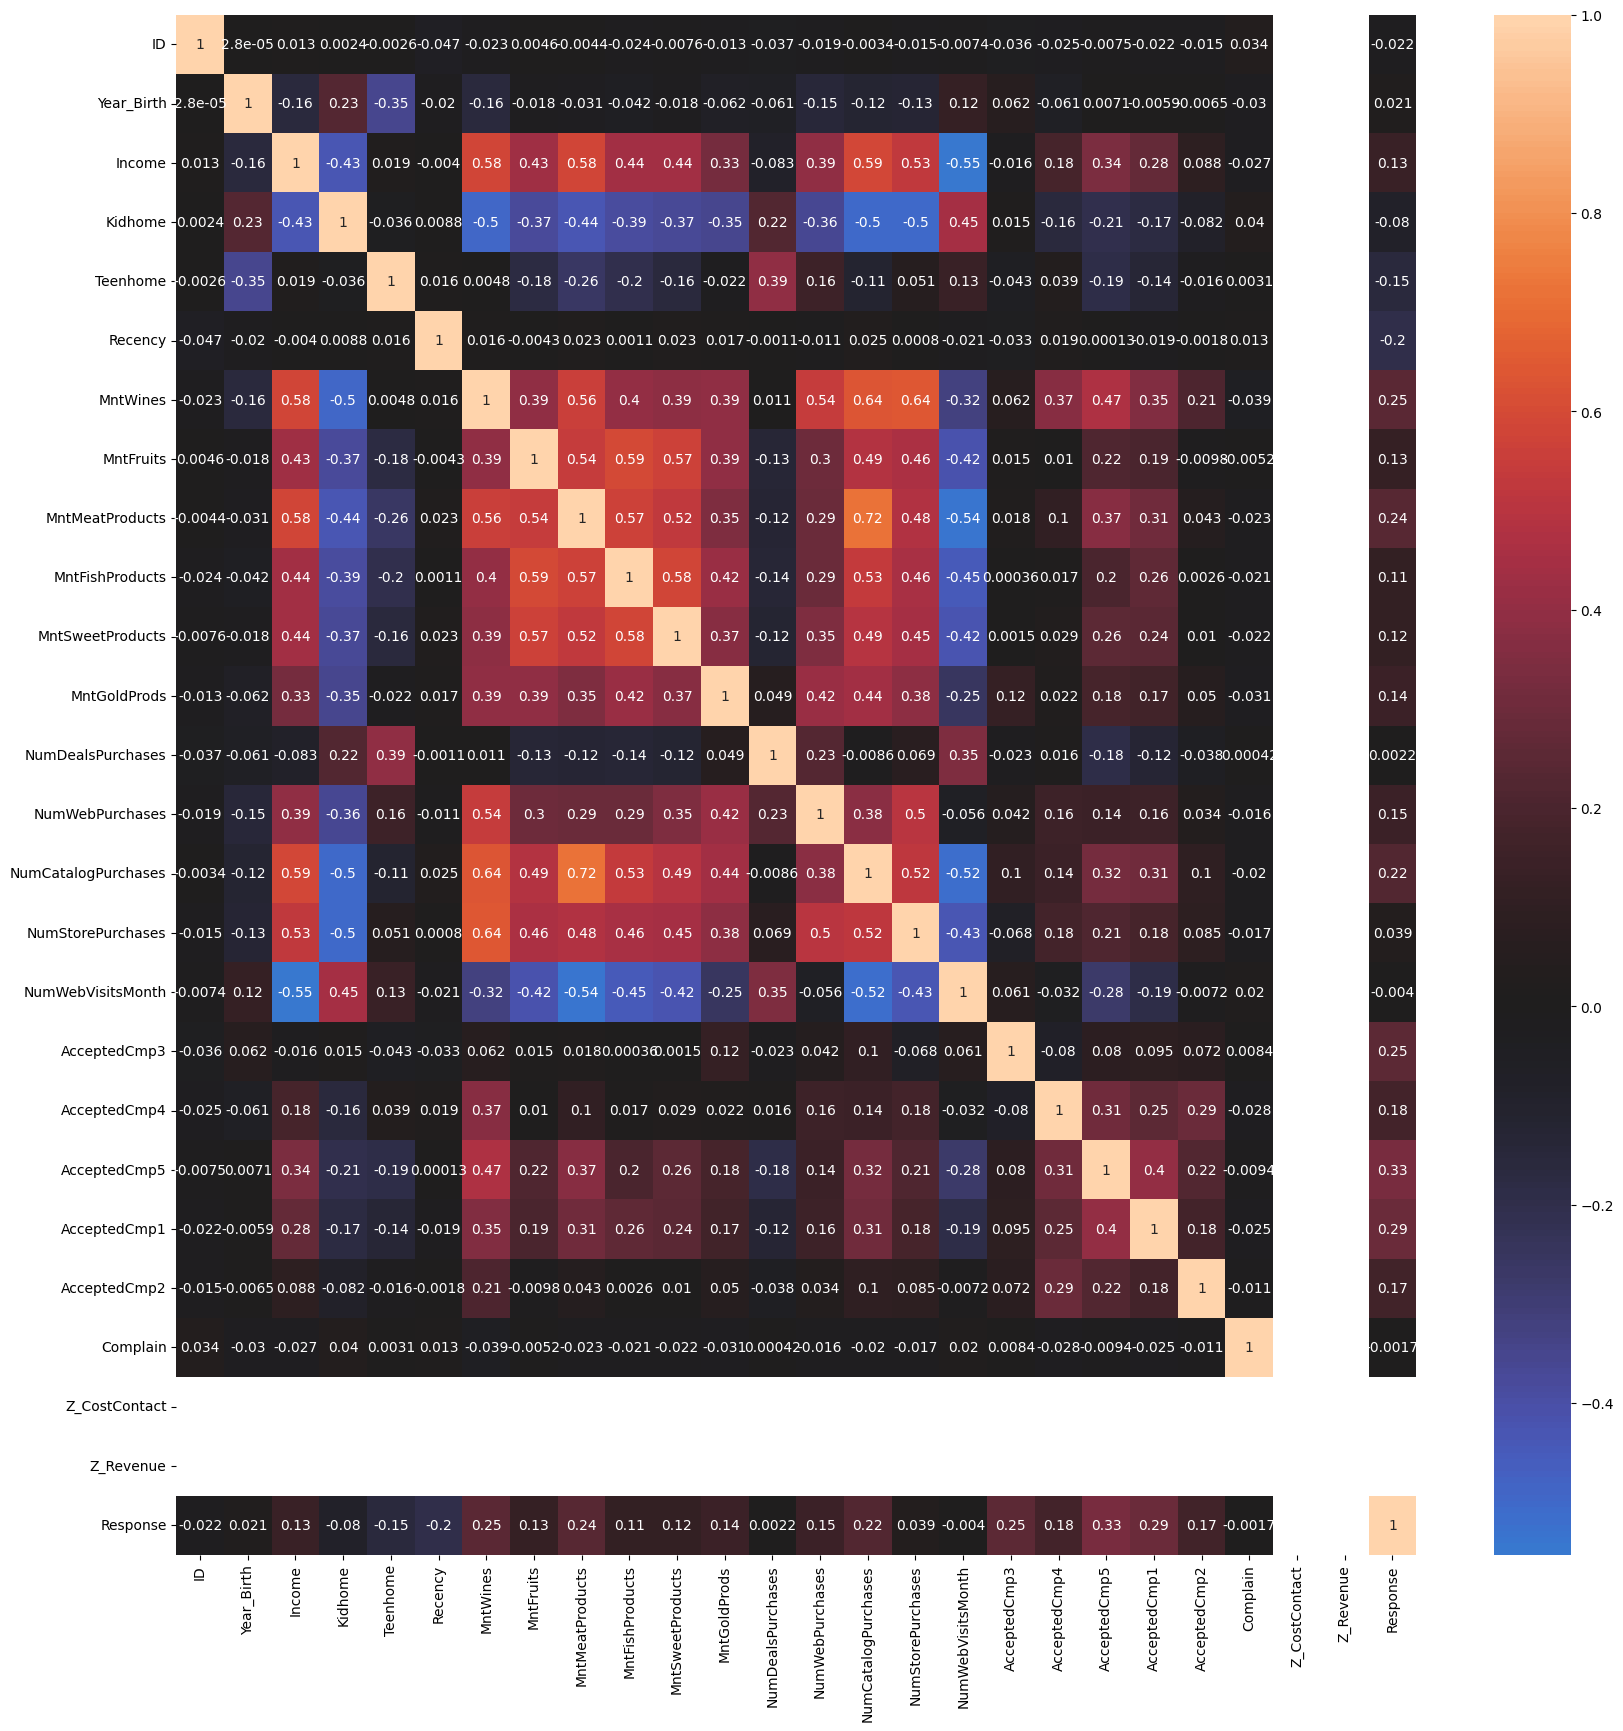

In [58]:
#correlation matrix
numerical_df = df.select_dtypes(include=np.number)  # Select only numerical features for correlation calculation

# Compute the correlation matrix
corrmat = numerical_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True,center=0)

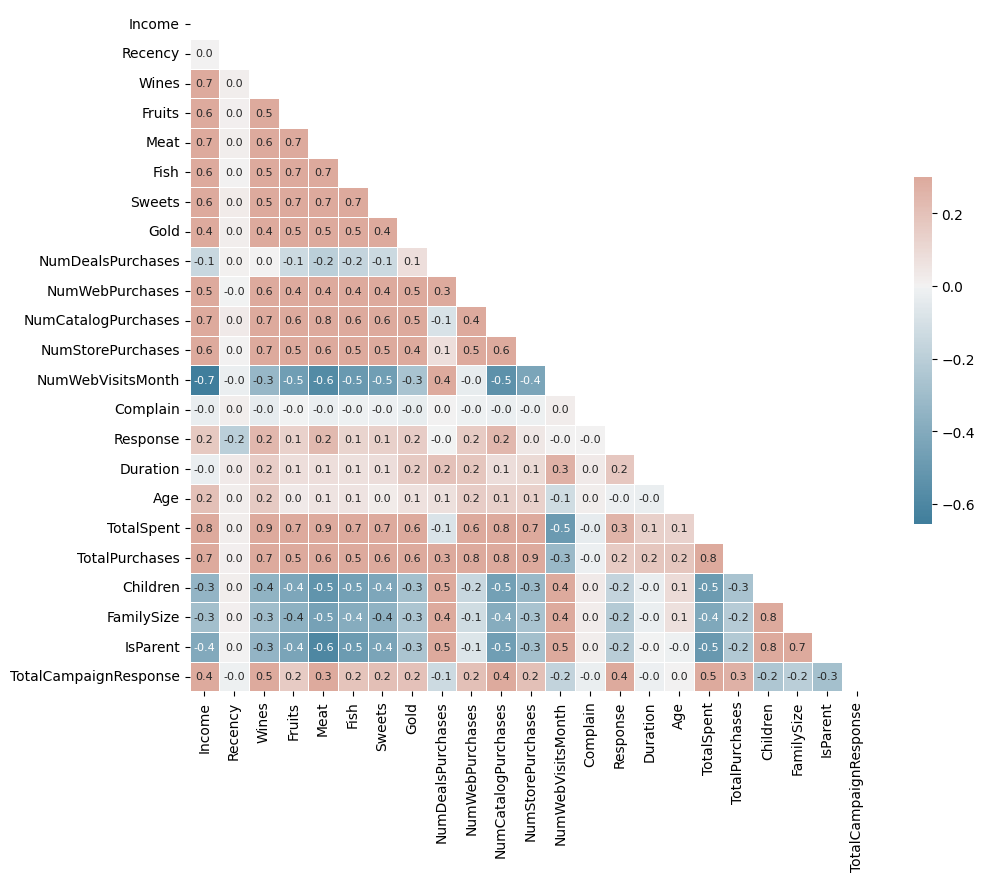

In [59]:
def plot_correlation_heatmap(df):

    numerical_df = df.select_dtypes(include=np.number)  # Select only numerical features for correlation calculation

    # Compute the correlation matrix
    corr = numerical_df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    f, ax = plt.subplots(figsize=(11, 9))

    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                annot=True, fmt=".1f", annot_kws={"size": 8})
    plt.show()

# Example usage with df_clean
plot_correlation_heatmap(df_clean)

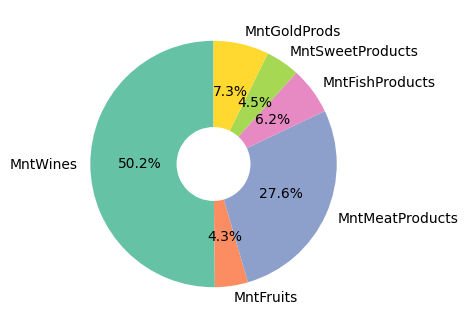

In [60]:
#Distribution of Products
products = df.loc[:,['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]
products_tot = products.sum()
#products_tot

plt.figure(figsize=(4,4))
plt.pie(products_tot,labels=products_tot.index,wedgeprops={'width': 0.7},textprops={'fontsize': 10},autopct='%1.1f%%',startangle=90,colors=sns.color_palette('Set2'))
plt.show()

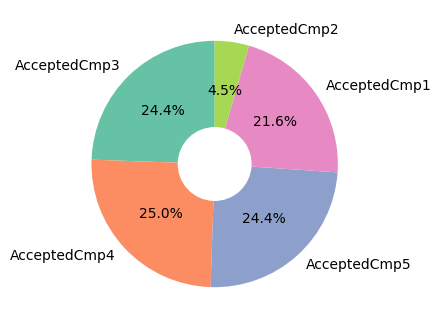

In [61]:
#distribution of Promotion Acceptance
promotion = df.loc[:,['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']]
promotion_tot = promotion.sum()
#products_tot

plt.figure(figsize=(4,4))
plt.pie(promotion_tot,labels=promotion_tot.index,wedgeprops={'width': 0.7},textprops={'fontsize': 10},
        autopct='%1.1f%%',startangle=90,colors=sns.color_palette('Set2'))
plt.show()

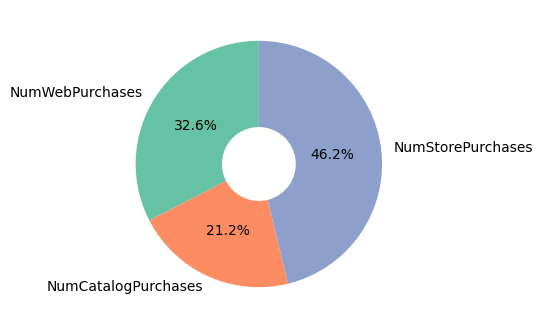

In [62]:
#distribution of Places
places = df.loc[:,[ 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']]
places_tot = places.sum()

plt.figure(figsize=(4,4))
plt.pie(places_tot,labels=places_tot.index,wedgeprops={'width': 0.7},textprops={'fontsize': 10},
        autopct='%1.1f%%',startangle=90,colors=sns.color_palette('Set2'))
plt.show()

Line Chart: Relationship between Purchase and Age

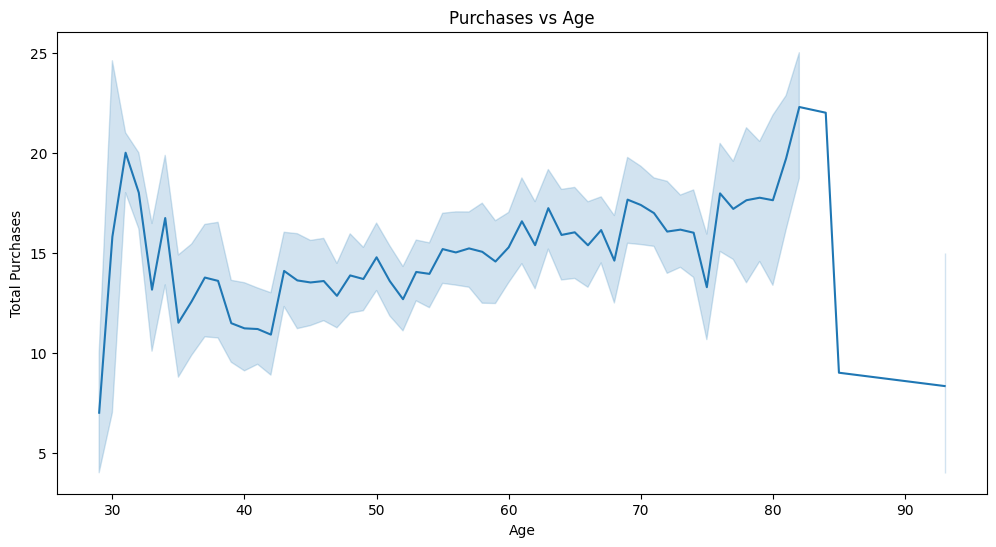

In [63]:
# line chart between Age and TotalPurchases
plt.figure(figsize = (12, 6))
sns.lineplot(df_clean, x = 'Age', y = 'TotalPurchases')
plt.title("Purchases vs Age")
plt.ylabel('Total Purchases')
plt.show()

This EDA has given us key insights into customer behaviours. It gave us a fair idea of how a customer's age, income, education and total kids can impact their shopping choices.

This information can be leveraged in curating bespoke offers for a certain segment of customers.

eg. A customer who's 'Married' and in the age bracket of '40-50' will be more likely to buy 'Wines or Meat Products' thorugh a **'discout', from a 'Store or Website'**

At this point we can also create specific Customer Personas reaching out to them with specific marketing strategies.

eg. A Customer Persona can be: Single--Graduate--(Age:20-30)

Distribution Plots

In [64]:
import math  #import the math module

def find_binary_columns(df):
    binary_cols = []
    for col in df.columns:
        if df[col].nunique() == 2:  # Check for exactly 2 unique values
            binary_cols.append(col)
    return binary_cols

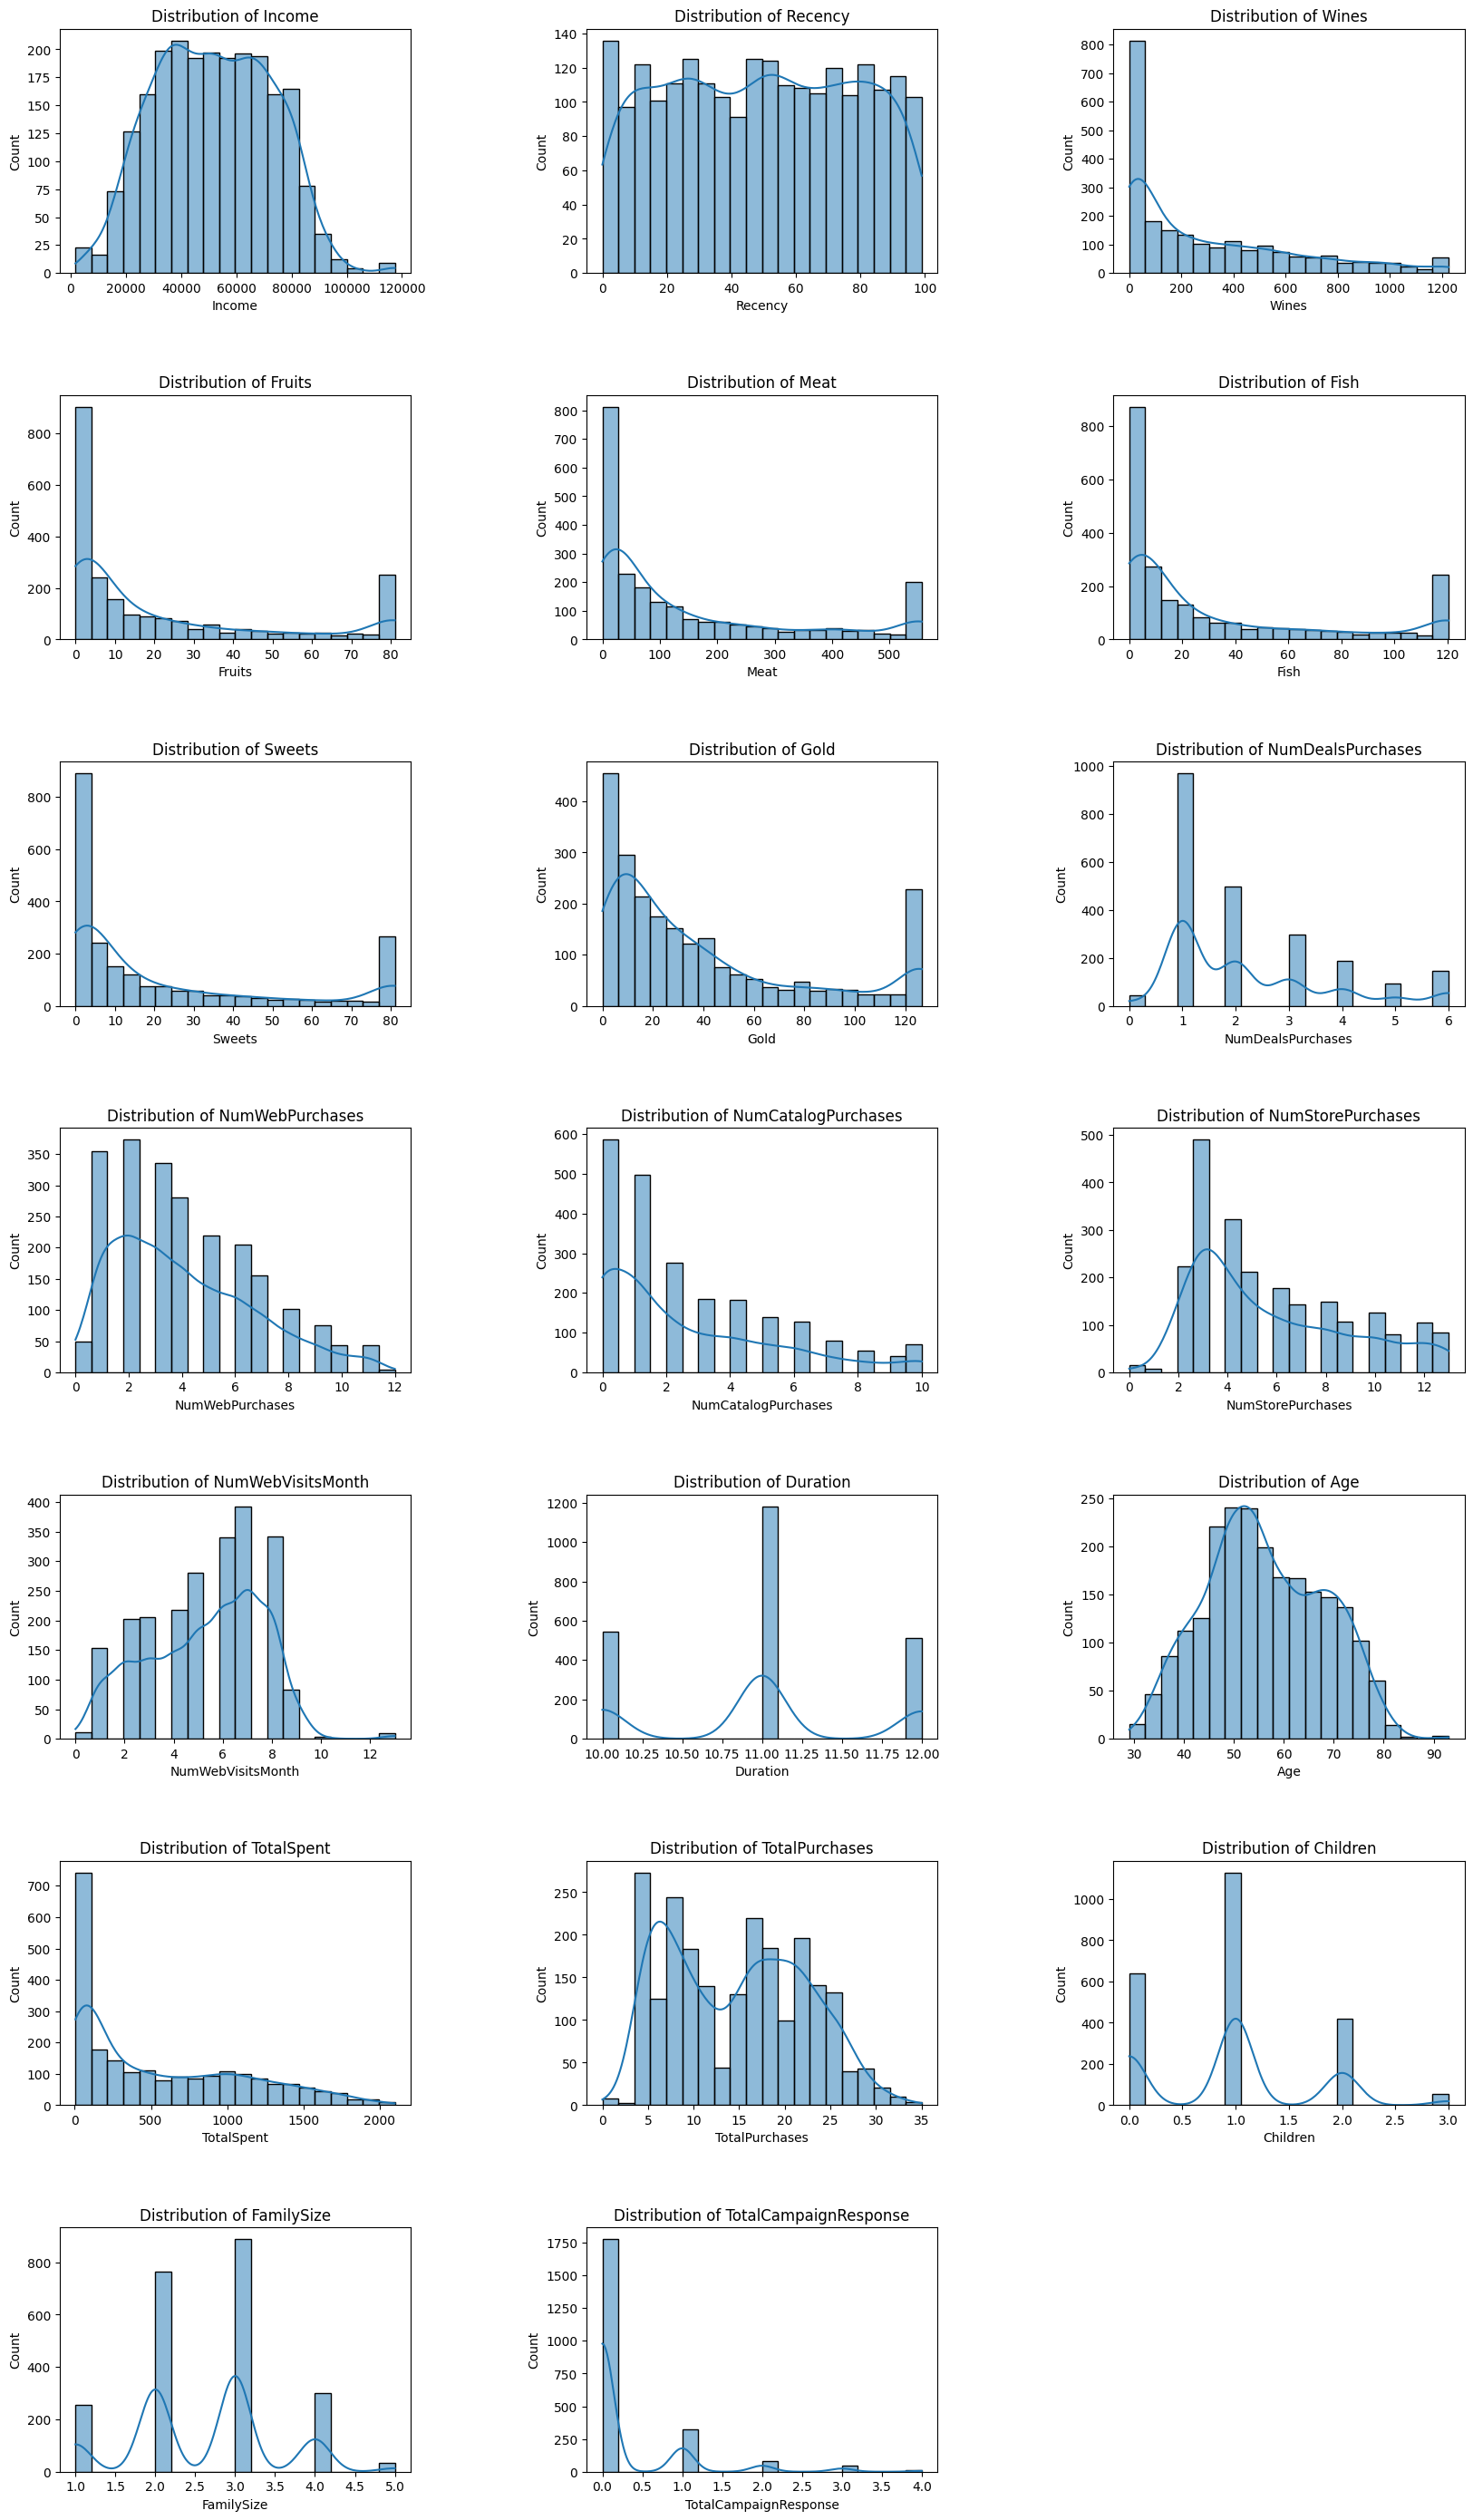

In [65]:
# extracting numerical columns
cols_for_dist_plots = df_clean.select_dtypes(include=['number']).columns.tolist()

#exclude binary columns
binary_columns_to_exclude = find_binary_columns(df_clean)
cols_for_dist_plots = [item for item in cols_for_dist_plots if item not in binary_columns_to_exclude]

# calculating the number of rows and columns needed for subplots
num_cols = 3 # no of columns per row
num_rows = math.ceil(len(cols_for_dist_plots) / num_cols)

# setting up the subplots
plt.figure(figsize=(20, 5 * num_rows))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

#  creating histograms
for i, column in enumerate(cols_for_dist_plots, 1):
  plt.subplot(num_rows, num_cols, i)
  sns.histplot(df_clean, x=column, kde=True, bins=20)
  plt.title(f"Distribution of {column}")

# viewing the plots
plt.show()

### **Data Encoding**

In [66]:
non_numerical_columns = df_clean.select_dtypes(exclude=['number']).columns

# displaying columns
df_clean[non_numerical_columns]

EducationLevel LivingStatus
0          Graduate         Solo
1          Graduate         Solo
2          Graduate    Partnered
3          Graduate    Partnered
4      Postgraduate    Partnered
...             ...          ...
2235       Graduate    Partnered
2236   Postgraduate    Partnered
2237       Graduate         Solo
2238   Postgraduate    Partnered
2239   Postgraduate    Partnered

[2240 rows x 2 columns]

In [67]:
EducationLevel_mapping = {'Undergraduate': 0, 'Graduate': 1, "Postgraduate": 2}
LivingStatus_mapping = {'Solo': 0, 'Partnered': 1}

# applying custom mappings to EducationStatus and EmploymentStatus columns
df_clean['EducationLevel'] = df_clean['EducationLevel'].map(EducationLevel_mapping)
df_clean['LivingStatus'] = df_clean['LivingStatus'].map(LivingStatus_mapping)

In [68]:
df_clean['EducationLevel'].unique()

array([1, 2, 0])

In [69]:
df_clean['LivingStatus'].unique()

array([0, 1])

In [70]:
df_clean.head()

Income  Recency  Wines  Fruits  Meat   Fish  Sweets  Gold  \
0  58138.0       58    635      81   546  120.5      81  88.0   
1  46344.0       38     11       1     6    2.0       1   6.0   
2  71613.0       26    426      49   127  111.0      21  42.0   
3  26646.0       26     11       4    20   10.0       3   5.0   
4  58293.0       94    173      43   118   46.0      27  15.0   

   NumDealsPurchases  NumWebPurchases  ...  Duration  Age  TotalSpent  \
0                  3                8  ...        12   68      1551.5   
1                  2                1  ...        10   71        27.0   
2                  1                8  ...        11   60       776.0   
3                  2                2  ...        10   41        53.0   
4                  5                5  ...        10   44       422.0   

   TotalPurchases  EducationLevel  LivingStatus  Children  FamilySize  \
0              25               1             0         0           1   
1               6               1             0         2           3   
2              21               1             1         0           2   
3               8               1             1         1           3   
4              19               2             1         1           3   

   IsParent  TotalCampaignResponse  
0         0                      0  
1         1                      0  
2         0                      0  
3         1                      0  
4         1                      0  

[5 rows x 25 columns]

All columns in the DataFrame are numeric, which is fit for modeling.

conatins num_dtypes = [ 'int' , 'float' ]

In [71]:
df_clean.dtypes

Income                   float64
Recency                    int64
Wines                      int64
Fruits                     int64
Meat                       int64
Fish                     float64
Sweets                     int64
Gold                     float64
NumDealsPurchases          int64
NumWebPurchases            int64
NumCatalogPurchases        int64
NumStorePurchases          int64
NumWebVisitsMonth          int64
Complain                   int64
Response                   int64
Duration                   int64
Age                        int64
TotalSpent               float64
TotalPurchases             int64
EducationLevel             int64
LivingStatus               int64
Children                   int64
FamilySize                 int64
IsParent                   int64
TotalCampaignResponse      int64
dtype: object

### **Data Normalization**

StandardScaler normalizes the data, which resulted in mean = 0 and standard deviation = 1.

In [72]:
df_scaled = df_clean.copy()

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
sc = StandardScaler()

In [75]:
sc.fit(df_scaled)

StandardScaler()

In [76]:
df_scaled = pd.DataFrame(sc.transform(df_scaled), columns = df_scaled.columns)

In [77]:
df_scaled

Income   Recency     Wines    Fruits      Meat      Fish    Sweets  \
0     0.299651  0.307039  1.005751  2.176816  2.210169  2.190303  2.145044   
1    -0.263808 -0.383664 -0.879539 -0.758828 -0.810358 -0.746320 -0.760435   
2     0.943420 -0.798086  0.374300  1.002558 -0.133536  1.954878 -0.034065   
3    -1.204881 -0.798086 -0.879539 -0.648741 -0.732048 -0.548067 -0.687798   
4     0.307056  1.550305 -0.390089  0.782385 -0.183879  0.344072  0.183846   
...        ...       ...       ...       ...       ...       ...       ...   
2235  0.447037 -0.107383  1.229327  0.782385  0.174110  0.244945  2.145044   
2236  0.580377  0.237969  0.313874 -0.795523 -0.676113 -0.795883 -0.796753   
2237  0.244375  1.446700  1.830566  0.965863  0.369885 -0.002871 -0.360931   
2238  0.830288 -1.419719  0.380342  0.305343  0.353104  1.186647  0.292802   
2239  0.047924 -0.314594 -0.658984 -0.685437 -0.502712 -0.746320 -0.760435   

          Gold  NumDealsPurchases  NumWebPurchases  ...  Duration       Age  \
0     1.215280           0.509888         1.488353  ...  1.474828  1.007064   
1    -0.838900          -0.140168        -1.156408  ... -1.435846  1.261969   
2     0.062935          -0.790225         1.488353  ...  0.019491  0.327318   
3    -0.863951          -0.140168        -0.778585  ... -1.435846 -1.287080   
4    -0.613442           1.810001         0.354884  ... -1.435846 -1.032175   
...        ...                ...              ...  ...       ...       ...   
2235  2.179743          -0.140168         1.866176  ...  0.019491  0.157381   
2236 -0.788798           2.460058         1.488353  ... -1.435846  1.941715   
2237 -0.387983          -0.790225        -0.778585  ... -1.435846 -1.032175   
2238  0.538904          -0.140168         0.732707  ... -1.435846  1.092032   
2239 -0.463136           0.509888        -0.400762  ...  1.474828  1.261969   

      TotalSpent  TotalPurchases  EducationLevel  LivingStatus  Children  \
0       1.797892        1.380023       -0.410013     -1.346874 -1.264505   
1      -0.989563       -1.163336       -0.410013     -1.346874  1.396361   
2       0.379937        0.844579       -0.410013      0.742460 -1.264505   
3      -0.942024       -0.895614       -0.410013      0.742460  0.065928   
4      -0.267330        0.576857        1.123256      0.742460  0.065928   
...          ...             ...             ...           ...       ...   
2235    1.125026        0.442996       -0.410013      0.742460  0.065928   
2236   -0.227104        0.844579        1.123256      0.742460  2.726794   
2237    1.230161        0.576857       -0.410013     -1.346874 -1.264505   
2238    0.502443        1.112301        1.123256      0.742460  0.065928   
2239   -0.724440       -0.494031        1.123256      0.742460  1.396361   

      FamilySize  IsParent  TotalCampaignResponse  
0      -1.759115 -1.584605              -0.439037  
1       0.446548  0.631072              -0.439037  
2      -0.656283 -1.584605              -0.439037  
3       0.446548  0.631072              -0.439037  
4       0.446548  0.631072              -0.439037  
...          ...       ...                    ...  
2235    0.446548  0.631072              -0.439037  
2236    2.652211  0.631072               1.035390  
2237   -1.759115 -1.584605               1.035390  
2238    0.446548  0.631072              -0.439037  
2239    1.549380  0.631072              -0.439037  

[2240 rows x 25 columns]

In [78]:
df_scaled.columns

Index(['Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
       'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Duration', 'Age', 'TotalSpent', 'TotalPurchases', 'EducationLevel',
       'LivingStatus', 'Children', 'FamilySize', 'IsParent',
       'TotalCampaignResponse'],
      dtype='object')

In [79]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 2240 non-null   float64
 1   Recency                2240 non-null   float64
 2   Wines                  2240 non-null   float64
 3   Fruits                 2240 non-null   float64
 4   Meat                   2240 non-null   float64
 5   Fish                   2240 non-null   float64
 6   Sweets                 2240 non-null   float64
 7   Gold                   2240 non-null   float64
 8   NumDealsPurchases      2240 non-null   float64
 9   NumWebPurchases        2240 non-null   float64
 10  NumCatalogPurchases    2240 non-null   float64
 11  NumStorePurchases      2240 non-null   float64
 12  NumWebVisitsMonth      2240 non-null   float64
 13  Complain               2240 non-null   float64
 14  Response               2240 non-null   float64
 15  Dura

## **5. DIMENSIONALITY REDUCTION**

In [80]:
# finding the current number of predictors
print("Current number of features are: ", len(df_scaled.columns))

Current number of features are:  25


In [81]:
from sklearn.decomposition import PCA

# creating a PCA object
pca = PCA(random_state=123, svd_solver='full')

# fitting the PCA model to the scaled data
pca.fit(df_scaled)

# calculating the cumulative sum of the explained variance ratios for each principal component
cumsum = np.cumsum(pca.explained_variance_ratio_)

# setting the level of explained variance that needs to be preserved
reqd_expl_var = 0.9

reqd_n_comp = np.argmax(cumsum >= reqd_expl_var) + 1

# printing details
print("The number of principal components required to preserve {}% of explained variance is {}".\
format(reqd_expl_var*100, reqd_n_comp))

The number of principal components required to preserve 90.0% of explained variance is 14


fit the PCA model with 14 principal components

In [82]:
from sklearn.decomposition import PCA
reqd_n_comp = 25

# initiating PCA to reduce dimensions, using the above calculate number of principal components
pca = PCA(n_components = reqd_n_comp, random_state = 123, svd_solver = 'full')

# fitting and transforming the PCA model
pca.fit(df_scaled)

pcs = pca.transform(df_scaled)

# creating a dataframe with the principal components and naming columns as PC1, PC2 … PCn
df_pcs = pd.DataFrame(data=pcs, columns=[f'PC{i+1}' for i in range(reqd_n_comp)])

print("Number of features in the data after feature reduction: ", len(df_pcs.columns))


Number of features in the data after feature reduction:  25


In [83]:
# viewing the new reduced data
df_pcs

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     5.704724 -0.076868  2.511215 -1.620064 -0.724246 -0.036287  0.367275   
1    -3.114236 -0.663119 -0.763887  1.014013 -1.239680 -0.981460  0.535161   
2     2.708952 -0.583540 -0.747026 -0.730755  0.101306 -0.809197  0.057105   
3    -3.019617 -0.924466 -0.597220 -0.098067  0.972351 -0.933799 -0.209834   
4    -0.154596  1.225301 -1.426870 -0.162653 -0.320084  0.496957 -0.692093   
...        ...       ...       ...       ...       ...       ...       ...   
2235  2.152988  1.556016 -0.633635 -1.181393  0.593825 -0.348749 -0.147232   
2236 -1.701596  4.493447 -1.214664  2.473098 -0.113272  0.056199  0.168134   
2237  2.639073 -1.898405  0.383029  0.241521 -1.107433  1.356906 -0.846322   
2238  2.032827  1.265363 -1.929370  1.158982 -0.247152 -1.852701  0.403596   
2239 -2.302732  1.746969  1.068487  1.457022  0.772998 -0.043243  0.514782   

           PC8       PC9      PC10  ...      PC16      PC17      PC18  \
0     0.882619  2.045567  1.000067  ... -0.137125  0.008634  0.342473   
1    -1.099870  1.296718 -0.146596  ...  0.055961 -0.090994  0.112206   
2     1.259344 -0.603762 -1.322441  ...  0.121916  0.786024 -1.332757   
3    -0.529107 -1.153364 -0.299280  ...  0.110148  0.324095  0.172793   
4    -0.924400 -1.293134  1.048453  ...  0.175573 -0.249286 -0.557372   
...        ...       ...       ...  ...       ...       ...       ...   
2235 -0.119114  0.429611 -0.286459  ... -0.507400 -1.057510  1.083232   
2236 -0.966070  0.555253 -0.734482  ... -0.045788 -0.621574 -0.493241   
2237 -1.571716 -1.708409 -0.893236  ...  1.902131  1.163630  0.745256   
2238  0.372295 -0.406468 -0.328690  ... -0.396895  0.800377 -0.203236   
2239  1.492920  1.676656  1.312264  ...  0.047693  0.246311  0.031919   

          PC19      PC20      PC21      PC22          PC23          PC24  \
0     0.800927 -0.194129 -0.161506 -0.045100  3.539756e-16  5.865693e-16   
1    -0.037508 -0.125380 -0.260857  0.084577  6.871807e-16  1.365712e-16   
2    -0.773177  0.084481 -0.765624  0.144145 -8.818550e-16 -3.088335e-16   
3     0.167484  0.189180  0.224675 -0.194291 -1.454866e-16 -3.782079e-16   
4     0.234003  0.478471  0.129189  0.532238 -7.561092e-16 -3.270336e-16   
...        ...       ...       ...       ...           ...           ...   
2235 -0.198847  1.020375 -0.242589 -0.495157 -3.675312e-16  4.258364e-16   
2236 -0.773199 -0.698289 -0.753882 -0.018899  1.020757e-15  2.894416e-16   
2237  0.149628 -0.301890 -0.629908  0.347490 -2.669892e-16  1.055991e-16   
2238  0.456430  0.030570  0.278744 -0.024187  2.430915e-16  1.664952e-16   
2239 -0.325484 -0.207507 -0.121616  0.342117  3.713729e-16  1.421915e-16   

              PC25  
0     1.254619e-17  
1    -1.695909e-16  
2     3.858066e-16  
3    -1.606782e-17  
4    -3.168034e-17  
...            ...  
2235  1.409247e-16  
2236  2.271600e-16  
2237 -5.314763e-16  
2238  3.295758e-16  
2239 -1.085928e-16  

[2240 rows x 25 columns]

A major benefit of principal components is that they are uncorrelated.We check using the heatmap

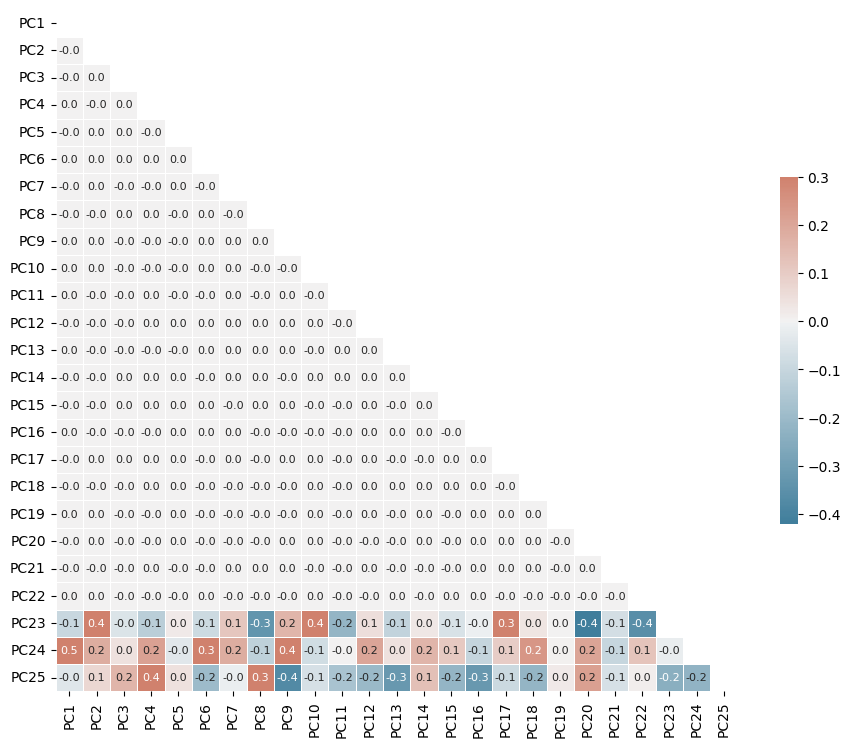

In [84]:
plot_correlation_heatmap(df_pcs)

## **6. CLUSTERING**

###**Performing hierarchy Clustering**


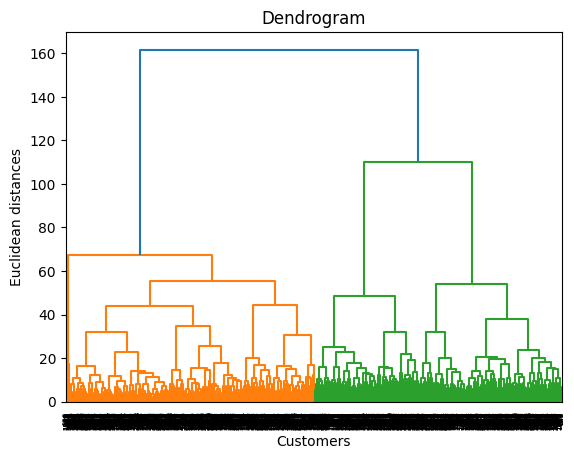

Silhouette Score for Hierarchical Clustering: 0.19204387716452992


In [85]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

# Assuming df_clean and df_pcs are already defined and preprocessed

df_with_clusters = df_clean.copy()

# Create dendrogram to visualize the hierarchical structure
dendrogram = sch.dendrogram(sch.linkage(df_pcs, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

n_clusters = 3  # Set to 3 clusters, adjust based on dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
#Fit the model to your data and create the 'Cluster_H' column:
df_with_clusters['Cluster_H'] = hc.fit_predict(df_pcs)

# Calculate Silhouette Score
silhouette_avg_hierarchical = silhouette_score(df_pcs, df_with_clusters['Cluster_H'])
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical}")

In [86]:
df_with_clusters['Cluster_H'].head()

0    2
1    0
2    2
3    0
4    0
Name: Cluster_H, dtype: int64

### **Performing DBSCAN Clustering**

Cluster_DBSCAN
-1    2157
 0      51
 1      32
Name: count, dtype: int64


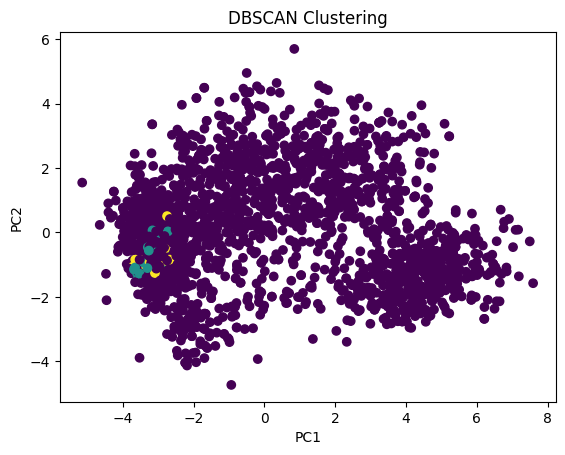

The average silhouette_score dbscan is : -0.15798927423138398


In [87]:

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=20)
df_with_clusters['Cluster_DBSCAN'] = dbscan.fit_predict(df_pcs)

print(df_with_clusters['Cluster_DBSCAN'].value_counts())


#visualization of DBSCAN clusters
plt.scatter(df_pcs['PC1'], df_pcs['PC2'], c=df_with_clusters['Cluster_DBSCAN'])
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Calculate Silhouette Score for DBSCAN

silhouette_avg_dbscan = silhouette_score(df_pcs, df_with_clusters['Cluster_DBSCAN'])
print("The average silhouette_score dbscan is :", silhouette_avg_dbscan)


###**Performing K-means Clustering**

With the preprocessed data and reduced features, you start the model-building process.

Finding the Best Value of K

To find the best value of K in K-means clustering, you balance between too many clusters (overfitting) and too few (underfitting).

Testing K values from 2 to 10, the optimal choice is **K=3** based on the WCSS elbow method, though **K=2** has the highest Silhouette score.

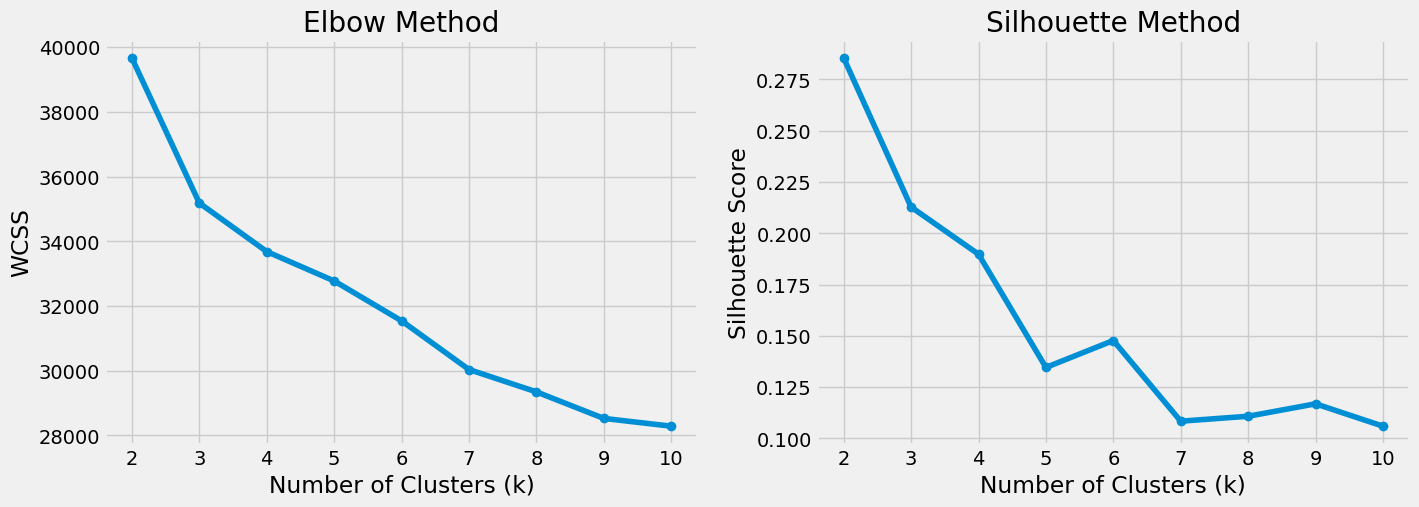

The best k value (using Silhouette method) is: 2


In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_best_k(data, max_k=10):
    wcss = []  # Within-cluster sum of squares
    silhouettes = []

    for k in range(2, max_k + 1):  # Iterate through different k values
        kmeans = KMeans(n_clusters=k, random_state=123).fit(data)
        wcss.append(kmeans.inertia_)

        if k > 1:  # Silhouette score needs at least 2 clusters
            labels = kmeans.labels_
            silhouettes.append(silhouette_score(data, labels))
        else:
            silhouettes.append(0)

    # Elbow method (find the point of greatest change in WCSS)
    diffs = np.diff(wcss)
    elbow_k = np.argmax(np.diff(diffs)) + 2  # +2 to adjust for starting at k=2

    # Silhouette method (find the highest silhouette score)
    silhouette_k = np.argmax(silhouettes) + 2  # +2 to adjust for starting at k=2

    # In this example, we'll prioritize the silhouette method for the best k
    best_k = silhouette_k

    return best_k, wcss, silhouettes

# Assuming df_pcs is your data
best_k, wcss_scores, silhouette_scores = find_best_k(df_pcs)

# Plot the results
plt.style.use("fivethirtyeight")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(range(2, len(wcss_scores) + 2), wcss_scores, marker='o')
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS')

ax2.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
ax2.set_title('Silhouette Method')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')

plt.show()

print(f"The best k value (using Silhouette method) is: {best_k}")

* The silhouette scores show K=3 has the second highest score, slightly lower than the highest score at K=2, indicating K=3 as a viable option.

In [89]:
# printing silhouette score for each cluster for better clarity
max_score = max(silhouette_scores)
max_index = silhouette_scores.index(max_score)

# Define k_range to represent the range of cluster values used
k_range = range(2, len(silhouette_scores) + 2)  # k values from 2 to max_k (10 in this case)

max_clusters = k_range[max_index]
for i, score in zip(k_range, silhouette_scores):
  print(f"Silhouette Score for {i} Clusters:", round(score, 4))
print(f"\n**Maximum Silhouette Score: {round(max_score, 4)} (achieved with {max_clusters} clusters)**")

Silhouette Score for 2 Clusters: 0.2854
Silhouette Score for 3 Clusters: 0.2128
Silhouette Score for 4 Clusters: 0.1898
Silhouette Score for 5 Clusters: 0.1346
Silhouette Score for 6 Clusters: 0.1477
Silhouette Score for 7 Clusters: 0.1084
Silhouette Score for 8 Clusters: 0.1108
Silhouette Score for 9 Clusters: 0.1169
Silhouette Score for 10 Clusters: 0.106

**Maximum Silhouette Score: 0.2854 (achieved with 2 clusters)**


### **Creating K-means models for K=2 and K=3**

* Based on the above analysis, you will create two K-means clustering models, one with K=2 and the other with K=3.

In [90]:
df_with_clusters = df_clean.copy()

In [91]:
# Developing a model with K-means algorithm where the value of K=2
kmeans_2 = KMeans(n_clusters=2, random_state=123)
df_with_clusters['Cluster_2'] = kmeans_2.fit_predict(df_pcs)

In [92]:

# Calculate Silhouette Score for K-means with 2 clusters
silhouette_avg_2 = silhouette_score(df_pcs, df_with_clusters['Cluster_2'])
print(f"Silhouette Score for K-means (k=2): {silhouette_avg_2}")

Silhouette Score for K-means (k=2): 0.2854487996475613


In [93]:
# Developing a model with K-means algorithm where the value of K=3
model_k3 = KMeans(n_clusters=3, random_state=123)
df_with_clusters['Cluster_3'] = model_k3.fit_predict(df_pcs)

In [94]:
print(df_with_clusters.head())

    Income  Recency  Wines  Fruits  Meat   Fish  Sweets  Gold  \
0  58138.0       58    635      81   546  120.5      81  88.0   
1  46344.0       38     11       1     6    2.0       1   6.0   
2  71613.0       26    426      49   127  111.0      21  42.0   
3  26646.0       26     11       4    20   10.0       3   5.0   
4  58293.0       94    173      43   118   46.0      27  15.0   

   NumDealsPurchases  NumWebPurchases  ...  TotalSpent  TotalPurchases  \
0                  3                8  ...      1551.5              25   
1                  2                1  ...        27.0               6   
2                  1                8  ...       776.0              21   
3                  2                2  ...        53.0               8   
4                  5                5  ...       422.0              19   

   EducationLevel  LivingStatus  Children  FamilySize  IsParent  \
0               1             0         0           1         0   
1               1             

Analyzing Clusters -
Analyze the two solutions to ensure that the clusters obtained from them are distinct enough from each other.

In [95]:
#Creating Cluster Images
pca_2 = PCA(n_components=2)

# fitting PCA on normalized data
df_pcs_2 = pca_2.fit_transform(df_scaled)
df_pcs_2 = pd.DataFrame(data=df_pcs_2, columns=['PC1','PC2'])

# adding cluster labels
df_pcs_2['Cluster_2'] = df_with_clusters['Cluster_2']
df_pcs_2['Cluster_3'] = df_with_clusters['Cluster_3']

create a function that utilizes the principal components, cluster labels, and centroid information to visualize the clusters.

In [96]:
# defining a function to image clusters
def plot_cluster_solution(df_pcs, cluster_labels, centroids, title, custom_colors):
    """
    Plot the cluster solution for given data.
    Parameters:
    df_pcs : Pandas DataFrame containing principal components.
    cluster_labels : Pandas Series containing cluster labels.
    centroids : Array containing coordinates of cluster centroids.
    title : String title for the plot.
    custom_colors : List of custom colors for clusters.
    """

    # setting figure size
    plt.figure(figsize=(10, 6))

    # creating scatterplot with custom colors
    sns.scatterplot(data=df_pcs, x='PC1', y='PC2', hue=cluster_labels, palette=custom_colors, alpha=0.5)

    # adding title and labels
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")

    # setting grid and adding legend
    plt.grid(False)
    plt.tight_layout()

    # adding centroids
    sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='X', s=250, color='red', label='Centroids')

    # setting legend title
    plt.legend(title='Cluster Label')

    # viewing plot
    plt.show()

* In the two-cluster solution and found that the two clusters were distinct enough.

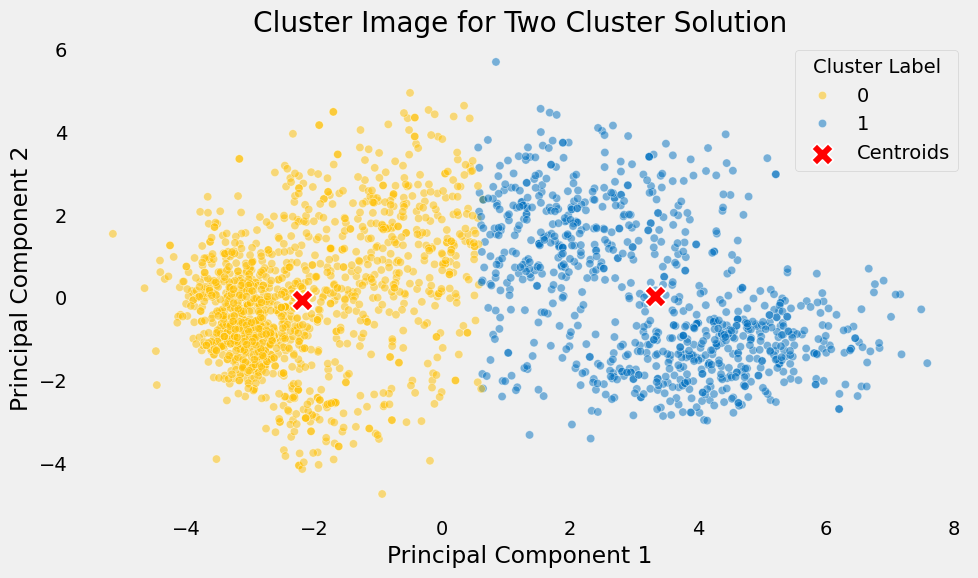

In [97]:
# plotting for 2 cluster

custom_colors_2 = ['#ffc000', '#0070c0']
plot_cluster_solution(df_pcs_2, 'Cluster_2',  kmeans_2.cluster_centers_,
"Cluster Image for Two Cluster Solution", custom_colors_2)

* In three-cluster solution and find a slight overlap.

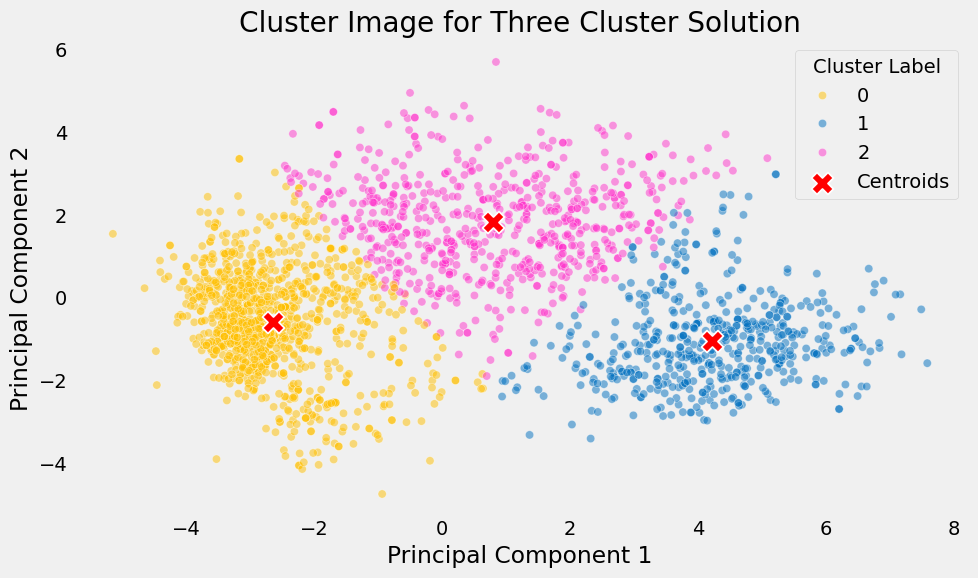

In [98]:
# plotting for 3 cluster solution

custom_colors_3 = ['#ffc000', '#0070c0', '#ff33cc']
plot_cluster_solution(df_pcs_2, 'Cluster_3', model_k3.cluster_centers_,
"Cluster Image for Three Cluster Solution", custom_colors_3)

## **calculating silhouette score for all clustering techniques**

**K-means Clustering algorithm is best**

In [99]:
# Calculate Silhouette Score for DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=20)
df_with_clusters['Cluster_DBSCAN'] = dbscan.fit_predict(df_pcs)
silhouette_avg_dbscan = silhouette_score(df_pcs, df_with_clusters['Cluster_DBSCAN'])
print("The average silhouette_score dbscan is :", silhouette_avg_dbscan)

# Calculate Silhouette Score for K-means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df_with_clusters['Cluster_2'] = kmeans.fit_predict(df_pcs)
silhouette_avg_kmeans = silhouette_score(df_pcs, df_with_clusters['Cluster_2'])
print(f"Silhouette Score for K-means (k=2): {silhouette_avg_kmeans}")

# Calculate Silhouette Score for Hierarchical Clustering
model_hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_with_clusters['Cluster_H'] = model_hierarchical.fit_predict(df_pcs)
silhouette_avg_hierarchical = silhouette_score(df_pcs, df_with_clusters['Cluster_H'])
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical}")

# Compare Silhouette Scores and determine the best algorithm
scores = {
    "DBSCAN": silhouette_avg_dbscan,
    "K-means (k=2)": silhouette_avg_kmeans,
    "Hierarchical Clustering": silhouette_avg_hierarchical
}

best_algorithm = max(scores, key=scores.get)
print(f"\nBest clustering algorithm based on Silhouette Score is: {best_algorithm} with a score of {scores[best_algorithm]}")

The average silhouette_score dbscan is : -0.15798927423138398
Silhouette Score for K-means (k=2): 0.2842229143822946
Silhouette Score for Hierarchical Clustering: 0.19204387716452992

Best clustering algorithm based on Silhouette Score is: K-means (k=2) with a score of 0.2842229143822946


## **Creating 3-D Plots**



To improve clarity, we create three-dimensional plots

visualize the clusters in relation to the three columns: Income, Age, and TotalSpent.

In [100]:
# Assuming kmeans_2 is your KMeans model with 2 clusters
cluster_labels_k2 = kmeans_2.labels_
cluster_labels_k3 = model_k3.labels_
# extracting required columns
df_3d = df_clean.loc[:,['Income', 'Age', 'TotalSpent']]
# adding cluster labels
df_3d['Cluster_2'] = cluster_labels_k2
df_3d['Cluster_3'] = cluster_labels_k3

In [101]:
# creating a user defined function to 3d plot cluster against three numerical columns
import plotly.express as px
def plot_3d_scatter(df, cluster_col, title):
  fig = px.scatter_3d(df, x='Income', y='Age', z='TotalSpent', color=cluster_col)
  fig.update_layout(title=title, scene=dict(xaxis_title='Income', yaxis_title='Age', zaxis_title='Total Spent'))
  fig.show(renderer='notebook')

* In 3d cluster plot for Cluster_2 we can find slight overlap.

In [102]:
# 3d cluster plot for Cluster_2
fig = px.scatter_3d(df_3d, x='Income', y='Age', z='TotalSpent', color='Cluster_2')
fig.update_layout(title_text="K-means Clustering (Cluster 2)")
fig.show()

* we can find relatively more overlap and clutter in 3d cluster plot for Cluster_3

In [103]:
# 3d cluster plot for Cluster_3
fig = px.scatter_3d(df_3d, x='Income', y='Age', z='TotalSpent', color='Cluster_3')
fig.update_layout(title_text="K-means Clustering (Cluster 3)")
fig.show()

### **Calculating Cluster Proportions**

Clusters should be balanced in size, with no single cluster dominating. Frequency pie charts for the cluster labels confirm that the cluster sizes are well-balanced.

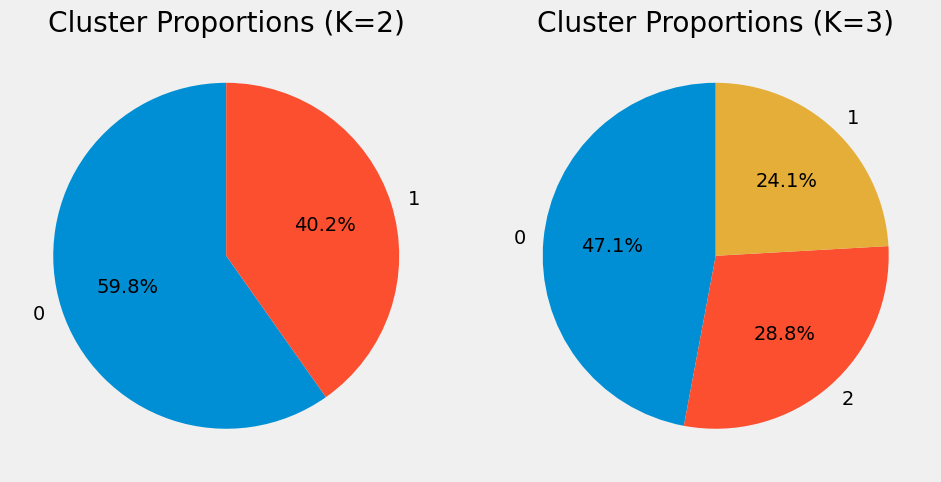

In [104]:
# Calculate cluster proportions for Cluster_2
cluster_2_proportions = df_with_clusters['Cluster_2'].value_counts(normalize=True)

# Calculate cluster proportions for Cluster_3
cluster_3_proportions = df_with_clusters['Cluster_3'].value_counts(normalize=True)

# Create pie charts
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(cluster_2_proportions, labels=cluster_2_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Cluster Proportions (K=2)')

plt.subplot(1, 2, 2)
plt.pie(cluster_3_proportions, labels=cluster_3_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Cluster Proportions (K=3)')

plt.tight_layout()
plt.show()

### **Defining Clusters: Analyzing Data for Different Clusters**

Refined cluster choices from 2 to 9 to just 2 and 3 , you created a function that calculates the mean of a numerical column grouped by a categorical column. The results were visualized with bar charts, showing the overall mean and 20% thresholds to highlight significant deviations. This helped analyze customer characteristics and informed the final K selection.

In [105]:
def cluster_analysis_by_cols(df, cols_for_analysis, cluster_column, colors, suptitle):
    """
    Generates bar plots for average numerical columns with class labels.

    Args:
        df: DataFrame containing the data.
        cols_for_analysis: List of numerical columns to analyze.
        cluster_column: Name of the column specifying cluster assignments.
        colors: Dictionary mapping cluster labels to colors.
        suptitle: Title for the entire plot.
    """


    num_cols = 4

    # Calculating number of rows based on the number of numerical columns and columns per row
    num_rows = (len(cols_for_analysis) + num_cols - 1) // num_cols
    plt.figure(figsize=(20, 5 * num_rows))
    bar_width = 0.35

    # Looping through numerical columns
    for i, column in enumerate(cols_for_analysis):

        # Creating subplots
        plt.subplot(num_rows, num_cols, i + 1)

        # Creating a bar plot for every numerical column
        for cluster, color in colors.items():
            cluster_data = df[df[cluster_column] == cluster]
            x_values = np.array([cluster - bar_width / 4, cluster + bar_width / 4])
            y_values = np.array([cluster_data[column].mean()] * 2)
            plt.bar(x_values, y_values, color=color, width=bar_width / 2, label=f'Cluster {cluster}')

        overall_mean = df[column].mean()

        # Calculating 20% above and below the mean
        mean_20_above = overall_mean * 1.2
        mean_20_below = overall_mean * 0.8


        plt.axhline(y=overall_mean, color='black', linestyle='-')
        plt.text(0.5, overall_mean, f'Overall Mean: {overall_mean:.2f}', color='black',
                 fontsize=9, fontweight='bold', ha='center', va='bottom')

        plt.axhline(y=mean_20_above, color='green', linestyle='-')
        plt.text(0.5, mean_20_above, f'20% Above Mean: {mean_20_above:.2f}', color='green',
                 fontsize=9, fontweight='bold', ha='center', va='bottom')

        plt.axhline(y=mean_20_below, color='red', linestyle='-')
        plt.text(0.5, mean_20_below, f'20% Below Mean: {mean_20_below:.2f}', color='red',
                 fontsize=9, fontweight='bold', ha='center', va='bottom')

        # Adding title and labels
        plt.title(column, fontweight='bold')
        plt.xlabel('Cluster')
        plt.ylabel(f'Mean {column}')
        plt.xticks(list(colors.keys()), list(colors.keys()))

        # Adjusting layout with tighter layout and rect to leave space for suptitle
        plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Adding suptitle
    plt.suptitle(suptitle, fontsize=20, fontweight='bold')

    # Viewing plot
    plt.show()

In [106]:
# saving all columns that need to be analyzed
reqd_cols = df_with_clusters.columns
reqd_cols = [item for item in reqd_cols if item not in ['Cluster_2', 'Cluster_3']]

**Two Cluster Solution:**

You apply the function to the data where there were two clusters. The key findings were

**Custer 0 Details:**

* Significantly above average income, spending on various products, campaign responses, and number of purchases.
*Significantly below average number of complaints, website visits, family size, and children.
* Slightly above average education level.
Average deals purchases, duration, age, and living status.

**Cluster 1 Details:**

* Significantly higher than average deals purchases, web visits, complaints, family size, and number of children.
* Significantly below average income, spending, response to campaigns, number of purchases and purchases through web, catalog, and store.
* Slightly below average education level.
Average duration, age, living status

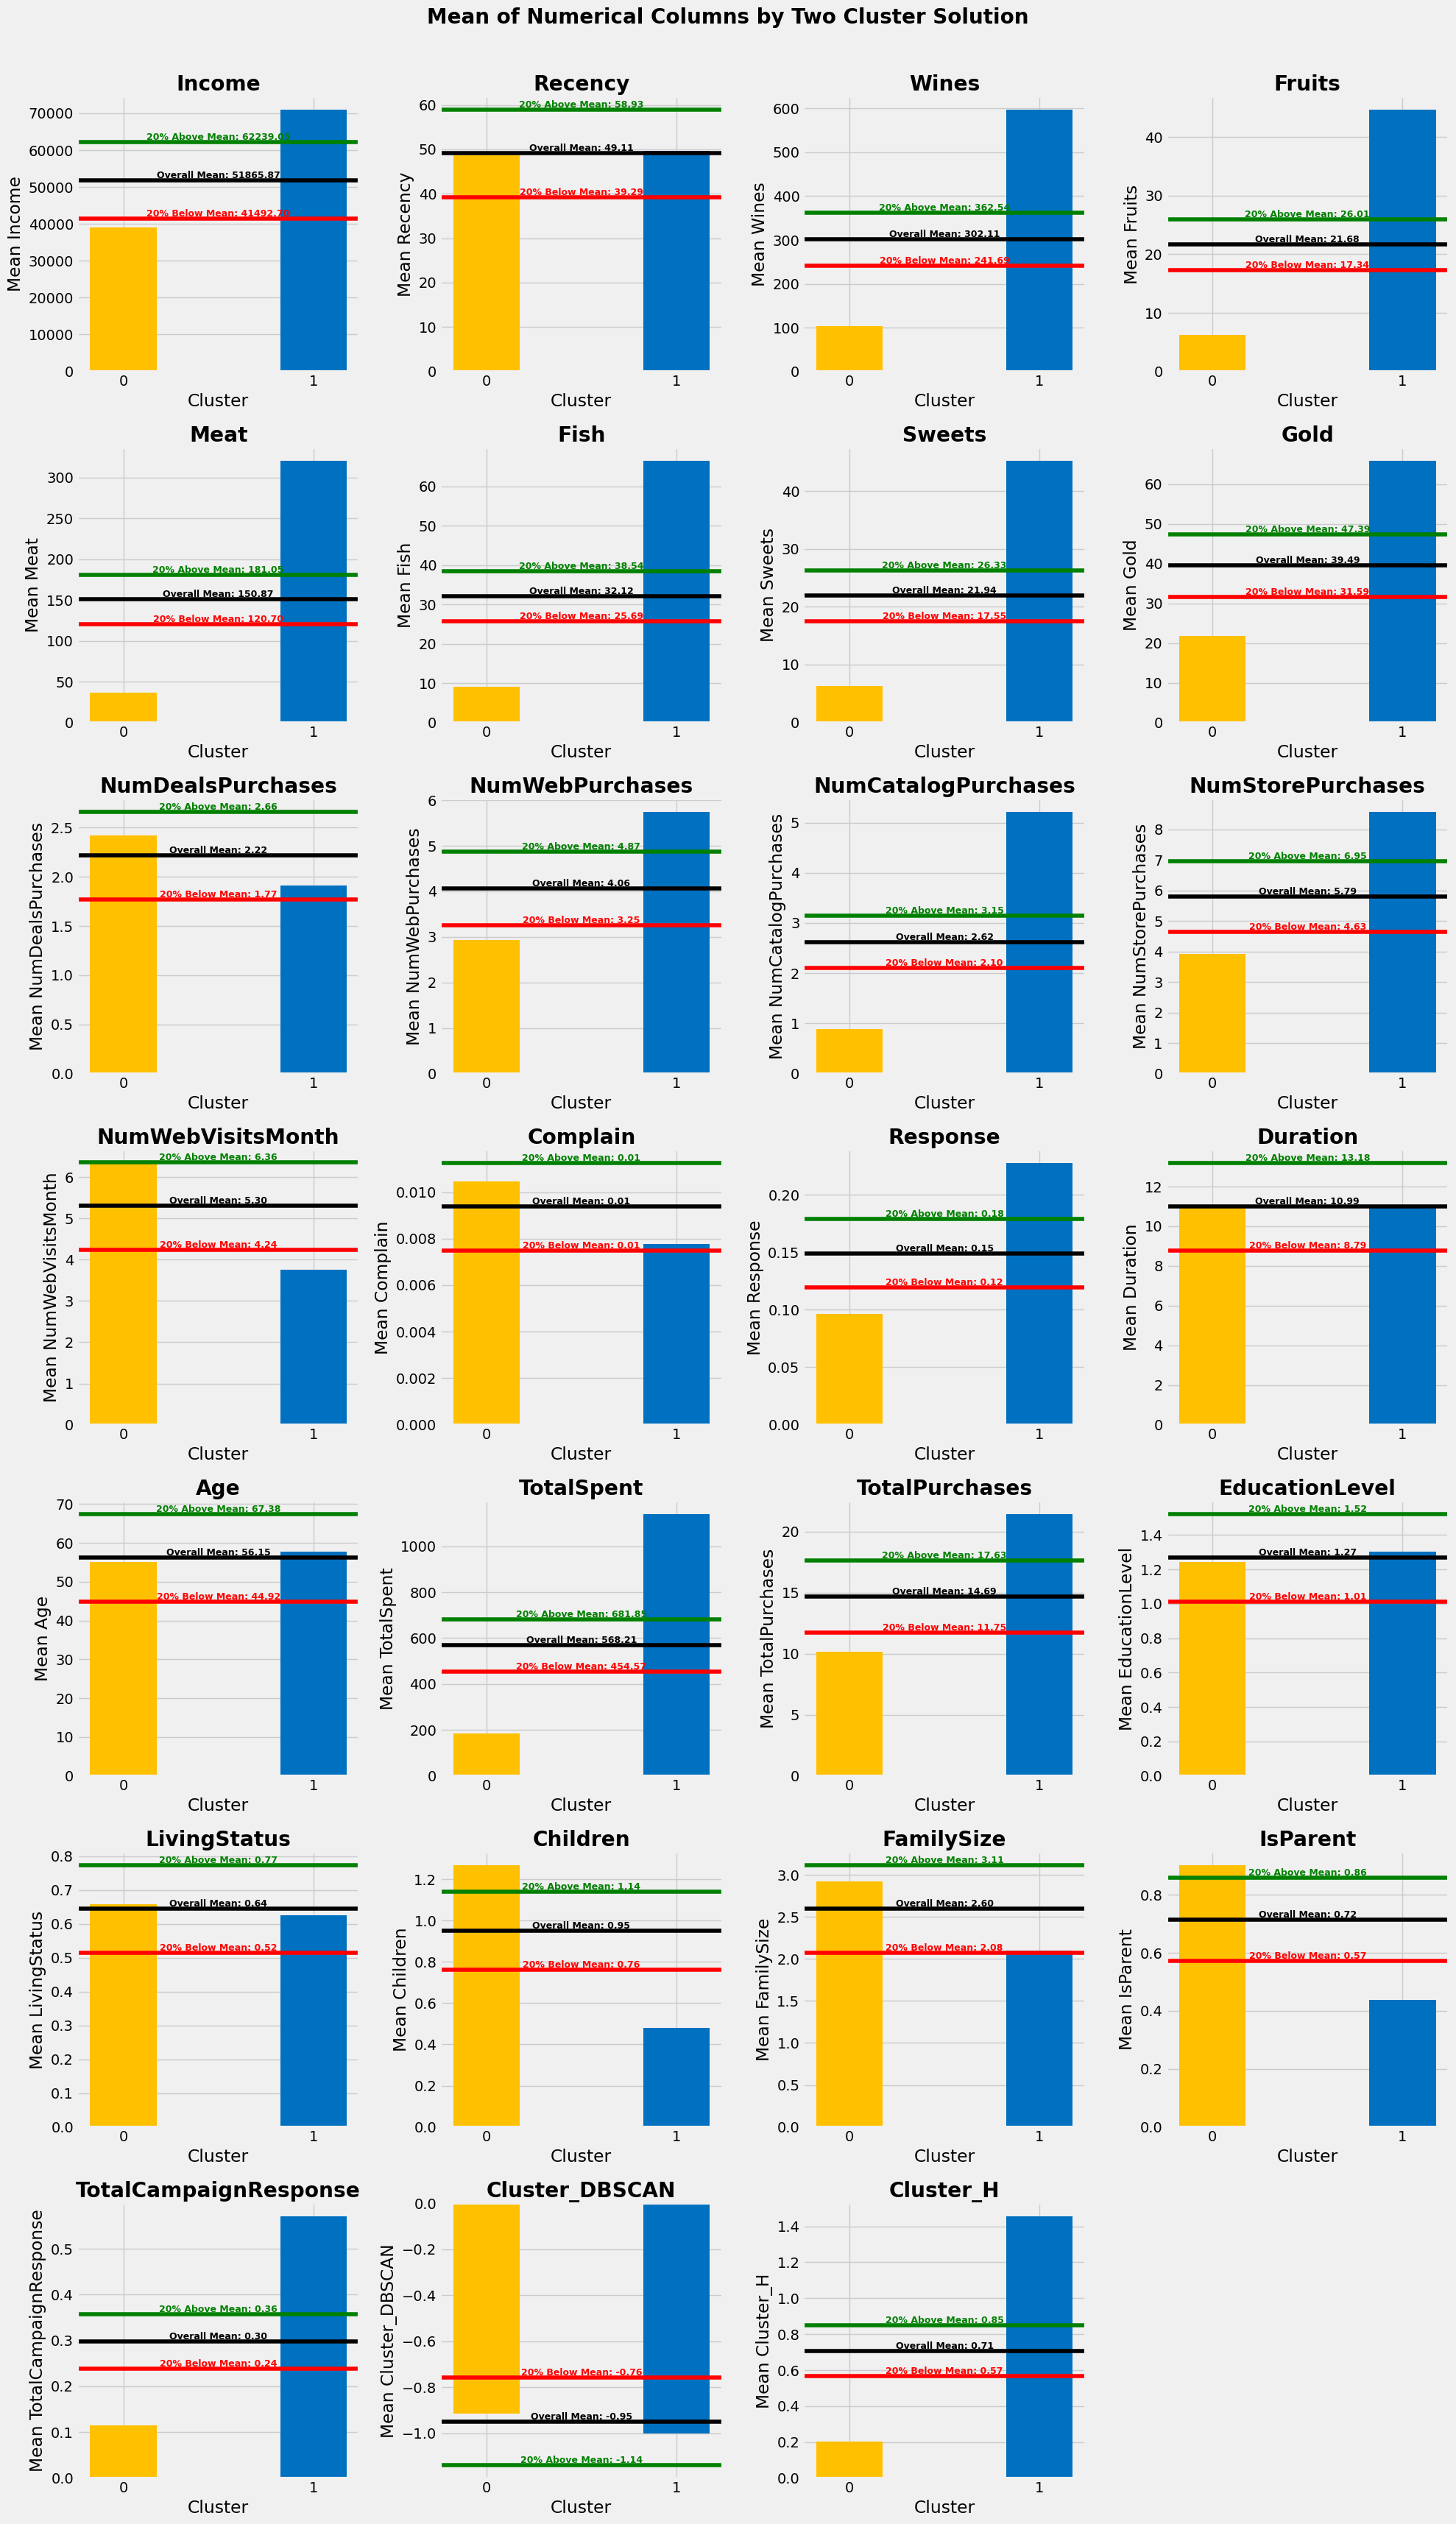

In [107]:
# using function to create plots for the two cluster solution
cluster_analysis_by_cols(df = df_with_clusters,
cols_for_analysis = reqd_cols,
cluster_column = 'Cluster_2',
colors = {0: '#ffc000', 1: '#0070c0'},
suptitle = 'Mean of Numerical Columns by Two Cluster Solution')

**Three Cluster Solution:**

* Upon applying the function to the three-cluster solution, you found that:

**Cluster 0 Details:**

* Significantly above average age web visits, complaints, and family size.

* Significantly below average income, total spending, total purchases, and campaign response.

* Average duration, age, education level, living status, and age.

**Cluster 1 Details:**

* Significantly above average income, total spending, total purchases, campaign response.

* Significantly below-average deal purchases, complaints, web visits, and family size.

* Average duration, education level, living status, and age.

**Cluster 2 Details:**

* Significantly above average spending in some categories like gold and wine and total purchases.

* Decent total spending. Large family size.

* Significantly below average only in campaign response.

* Average in most aspects such as income, purchases of most products, complaints, etc.

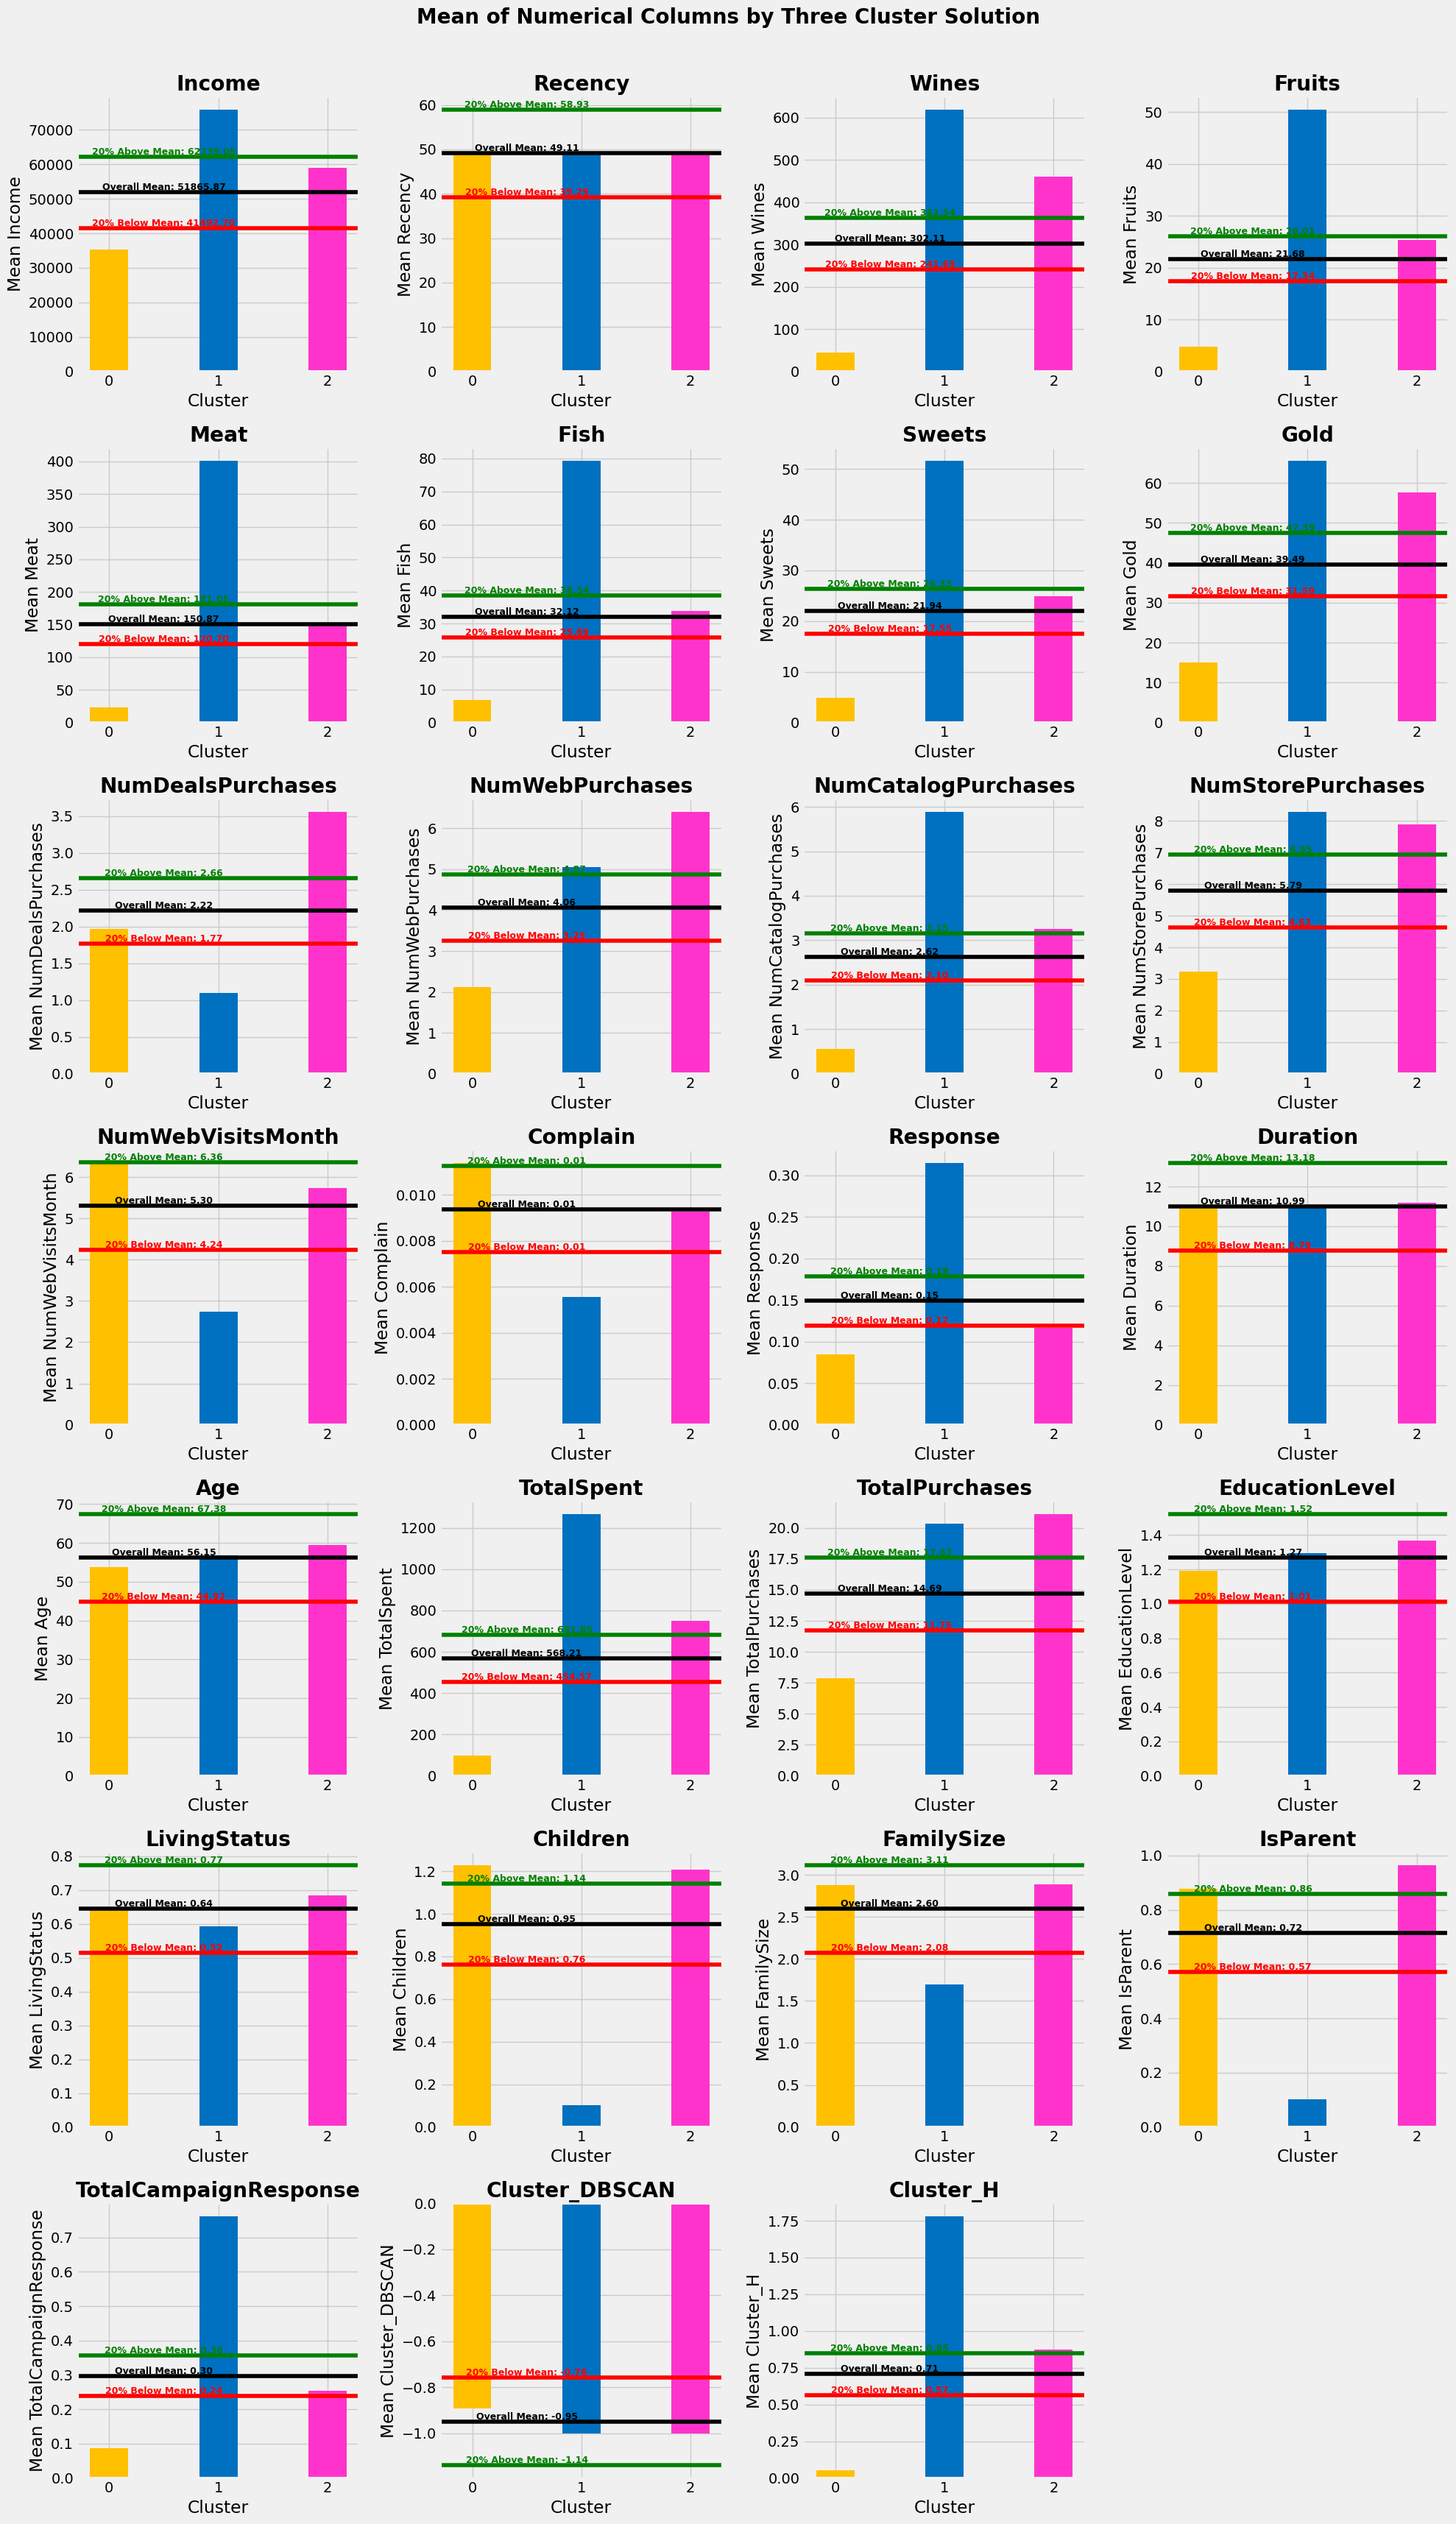

In [108]:
# using function to create plots for the three cluster solution
cluster_analysis_by_cols(df = df_with_clusters,
cols_for_analysis = reqd_cols,
cluster_column = 'Cluster_3',
colors = {0: '#ffc000', 1: '#0070c0', 2: '#ff33cc'},
suptitle = 'Mean of Numerical Columns by Three Cluster Solution')


## **Key Insights**

Based on the above findings, the two-cluster solution made more sense as it clearly could distinguish between the customers, with one cluster emerging as high value relative to the other.

On the other hand, the three-cluster solution was less distinct, with clusters 0 and 2 often exhibiting similar characteristics and overall means. Therefore, you officially consider the cluster labels of K=2 as customer types, naming cluster 0 as high values and cluster 1 as low values.

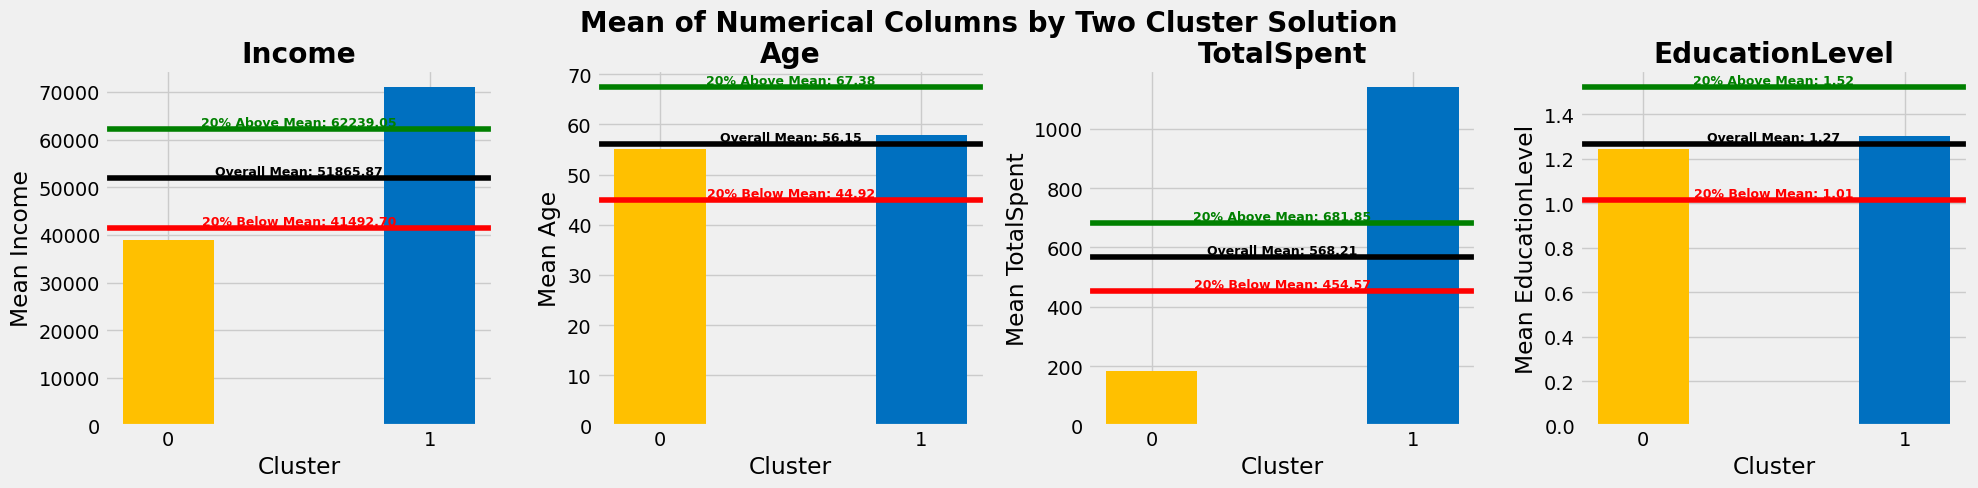

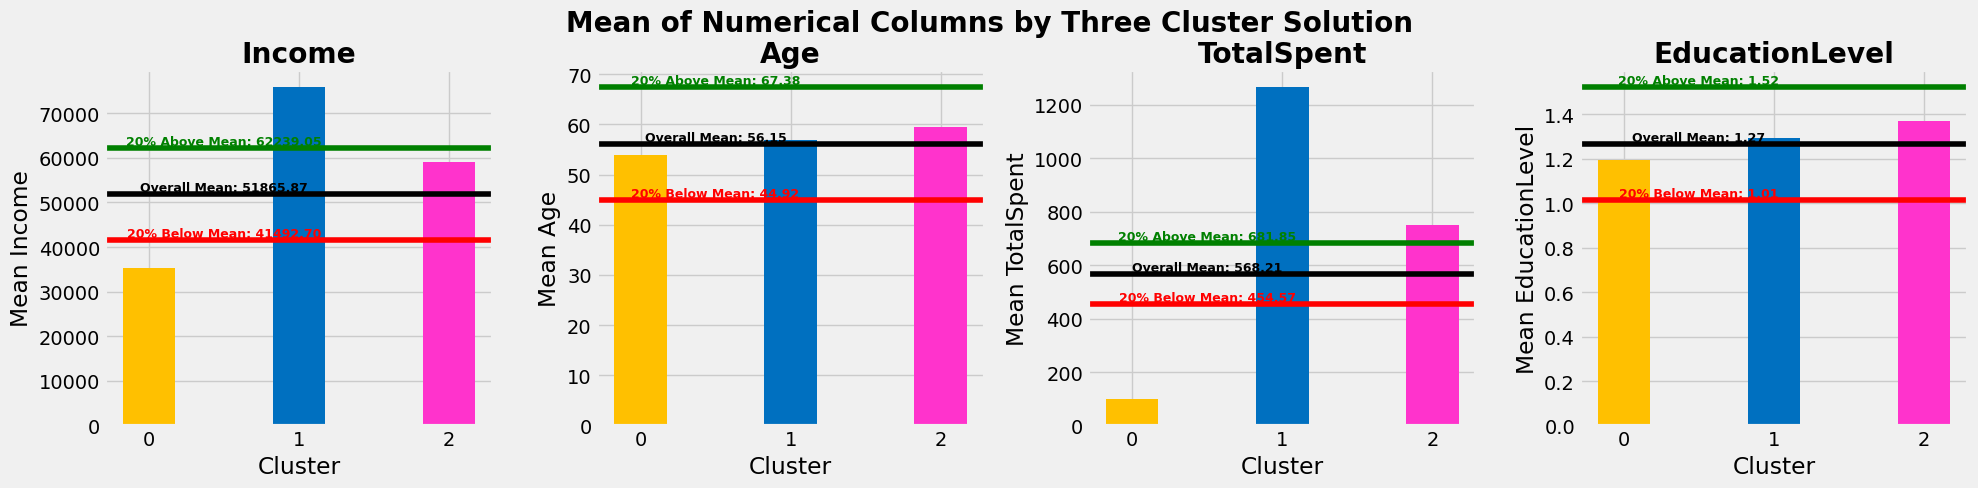

In [109]:
#Finding Key Insights
cols_for_analysis = ['Income', 'Age', 'TotalSpent', 'EducationLevel']
cluster_analysis_by_cols(df=df_with_clusters, cols_for_analysis=cols_for_analysis, cluster_column='Cluster_2',
                         colors={0: '#ffc000', 1: '#0070c0'}, suptitle='Mean of Numerical Columns by Two Cluster Solution')

cluster_analysis_by_cols(df=df_with_clusters, cols_for_analysis=cols_for_analysis, cluster_column='Cluster_3',
                         colors={0: '#ffc000', 1: '#0070c0', 2: '#ff33cc'}, suptitle='Mean of Numerical Columns by Three Cluster Solution')

**Proportion of High-Value Customers**

Based on the customer types, you will calculate a few key insights. The first one was that of the complete customer base around 40% were high-value.

In [110]:
df_clean_allcols = df.copy()

# assigning labels to the input data
df_clean_allcols['CustType'] = cluster_labels_k2

# making labels more understandable
df_clean_allcols['CustType'] = np.where(df_clean_allcols['CustType']==0,'High Value', 'Low Value')

In [111]:
def plot_freq_pie_chart(df, column_name, pie_colors):
  df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=pie_colors.values())
  plt.title(f'Frequency Distribution of {column_name}')
  plt.ylabel('')  # Remove the default ylabel
  plt.show()

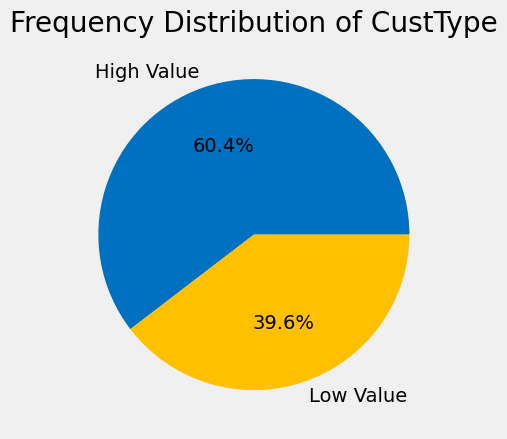

In [112]:
plot_freq_pie_chart(df = df_clean_allcols,
column_name = 'CustType',
pie_colors = {'Low Value': '#0070c0', 'High Value': '#ffc000'})

In [116]:
import pickle

# Save the KMeans model for 2 clusters
with open('kmeans_model_2.pkl', 'wb') as file:
    pickle.dump(kmeans_2, file)

# Save the PCA transformer
with open('pca_transformer.pkl', 'wb') as file:
    pickle.dump(pca, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)

print("Models saved successfully!")


Models saved successfully!


## **Conclusion**

**1. Methodology**

* **Dimensionality Reduction:** Found a 3D clustering plot generated, likely representing reduced dimensions using variables like income, age, and total spending.

* **Clustering Algorithm:** K-means was employed to create clusters. Visualizations include scatter plots showing clusters across key dimensions.

**2. Clustering Results**

* **Customer Segmentation:**

  * The code segments analyze the distribution of products (e.g., wine, fruits, meat, fish, sweets, gold) within clusters.

  * Visualizations like pie charts summarize the product preferences of customer segments.

**3. Customer Profiling**

* Specific profiling was done based on conditions such as income:
   * For instance, customers with incomes above 60,000 were isolated for further analysis, likely to understand their spending behavior.
   * Additional profiling could involve spending on specific product categories or family characteristics.

**Result:**

If strong cluster separation is the priority, the 2-cluster solution (based on silhouette scores) is ideal. However, if more granular insights are valuable, the 3-cluster solution (as suggested by the elbow method) offers better differentiation of customer behaviors.



